# House SalePrice Prediction

#### The objective is to model the price of houses with the available independent variables. This model can then be used by the management to understand how exactly the prices vary with the variables

In [218]:
import pandas as pd
import numpy as np

#DATA VISUALIZATION
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

### importing train dataset

In [219]:
df=pd.read_csv('housing_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [220]:
#checking shape of dataset
shape=df.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])


Total Number of Rows :  1168
Total Number of Features :  81


The given dataset contains 1168 rows & 81 column

In [221]:
#checking the features .ie column names
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [222]:
#checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [223]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [224]:
#checking data types of each column
print(df.columns.groupby(df.dtypes))

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

In [225]:
#checking for null values
df.isnull().values.any()

True

It means  null values are present in our dataset

In [226]:
#checking for null values in each column
print("Total number of empty rows in each feature:\n", df.isnull().sum())

Total number of empty rows in each feature:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


We can also see it via visualization with the help of heatmap

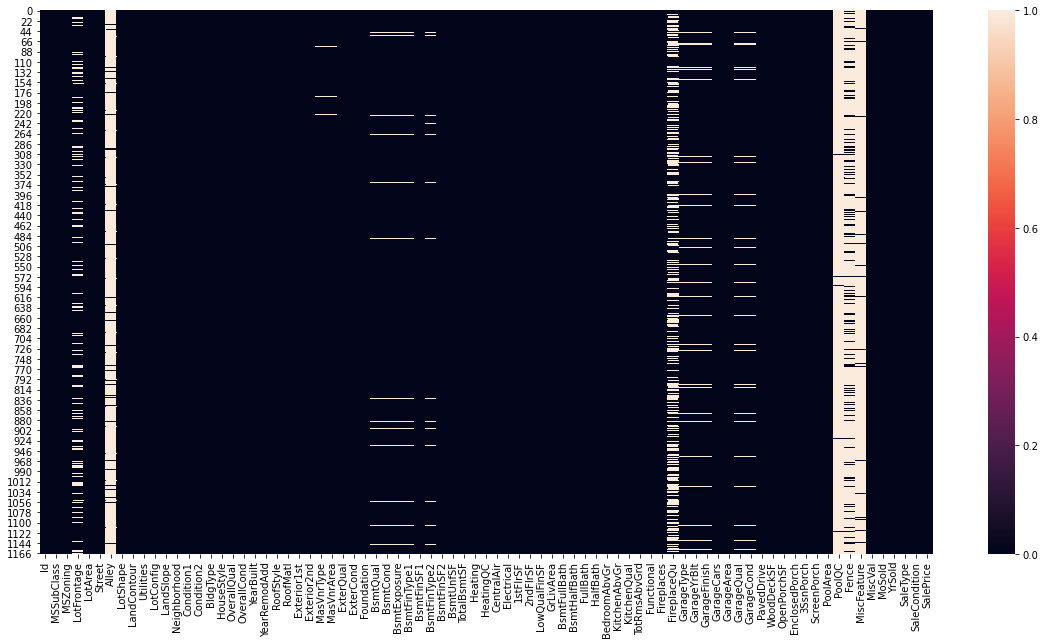

In [227]:
#visualisation
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

In [228]:
#Removing irrelevant features6
df.drop(["Id"],axis=1,inplace=True)

In [229]:
#making seperate lists of categorical and continuos varioables
categorical=[x for x in df.columns if df[x].dtype==object]
cont=[x for x in df.columns if x not in categorical]

In [230]:
print(len(categorical))
print(len(cont))

43
37


In [231]:
for i in categorical:
    if df[i].isnull().sum()>1:
         print("{}: {}% missing values".format(i, round(df[i].isnull().sum() * 100/len(df[i]),2)))

Alley: 93.41% missing values
MasVnrType: 0.6% missing values
BsmtQual: 2.57% missing values
BsmtCond: 2.57% missing values
BsmtExposure: 2.65% missing values
BsmtFinType1: 2.57% missing values
BsmtFinType2: 2.65% missing values
FireplaceQu: 47.17% missing values
GarageType: 5.48% missing values
GarageFinish: 5.48% missing values
GarageQual: 5.48% missing values
GarageCond: 5.48% missing values
PoolQC: 99.4% missing values
Fence: 79.71% missing values
MiscFeature: 96.23% missing values


In [232]:
#Removing irrelevant features6
df.drop(["PoolQC"],axis=1,inplace=True)

###### As per data description ,NA has different meaning for different features.So,lets 1st replace NA with actual words

In [233]:
# For Alley, NA means No_alley_access. Let's replace NAs with 'No_alley_access'
df['Alley'].fillna('No_alley_access',inplace=True)
print(df['Alley'].value_counts())

basement=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
#NA means No_Basement for all i in basement. Let's replace NAs with 'No_Basement'
for i in basement:
    df[i].fillna('No_Basement',inplace=True)
    print(df[i].value_counts())
    
    

# As per given definition, NA means None. Let's replace NAs with 'None'
df['MiscFeature'].fillna('None',inplace=True)
print(df['MiscFeature'].value_counts())

# As per given definition, NA means No_Fence. Let's replace NAs with 'No_Fence'
df['Fence'].fillna('No_Fence',inplace=True)
print(df['Fence'].value_counts())

#NA means No_Fireplace. Let's replace NAs with 'No_Fireplace'
df['FireplaceQu'].fillna('No_Fireplace',inplace=True)
print(df['FireplaceQu'].value_counts())

garage=['GarageType','GarageFinish','GarageQual','GarageCond']
# NA means No_Garage for all i in garage
for i in garage:
    df[i].fillna('No_Garage',inplace=True)
    print(df[i].value_counts())

No_alley_access    1091
Grvl                 41
Pave                 36
Name: Alley, dtype: int64
TA             517
Gd             498
Ex              94
No_Basement     30
Fa              29
Name: BsmtQual, dtype: int64
TA             1041
Gd               56
Fa               39
No_Basement      30
Po                2
Name: BsmtCond, dtype: int64
No             756
Av             180
Gd             108
Mn              93
No_Basement     31
Name: BsmtExposure, dtype: int64
Unf            345
GLQ            330
ALQ            174
BLQ            121
Rec            109
LwQ             59
No_Basement     30
Name: BsmtFinType1, dtype: int64
Unf            1002
Rec              43
LwQ              40
No_Basement      31
BLQ              24
ALQ              16
GLQ              12
Name: BsmtFinType2, dtype: int64
None    1124
Shed      40
Gar2       2
Othr       1
TenC       1
Name: MiscFeature, dtype: int64
No_Fence    931
MnPrv       129
GdPrv        51
GdWo         47
MnWw         10
Name:

In [234]:
#making seperate lists of categorical and continuos varioables
categorical=[x for x in df.columns if df[x].dtype==object]
cont=[x for x in df.columns if x not in categorical]

In [235]:
#Again checking for missing value in,object dtype column
for i in categorical:
    if df[i].isnull().sum()>1:
         print("{}: {}% missing values".format(i, round(df[i].isnull().sum() * 100/len(df[i]),2)))

MasVnrType: 0.6% missing values


After replacing all  categorical missing values with respective words,we notice that only 1 column is left with null values,which is  'MasVnrType'



In [236]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [237]:
#checking for null values in continuous feature
for i in cont:
    if df[i].isnull().sum()>1:
         print("{}: {}% missing values".format(i, round(df[i].isnull().sum() * 100/len(df[i]),2)))

LotFrontage: 18.32% missing values
MasVnrArea: 0.6% missing values
GarageYrBlt: 5.48% missing values


In [238]:
#filling missing data with imputation for numerical data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values  = np.nan, strategy = 'mean')
for i in cont:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))


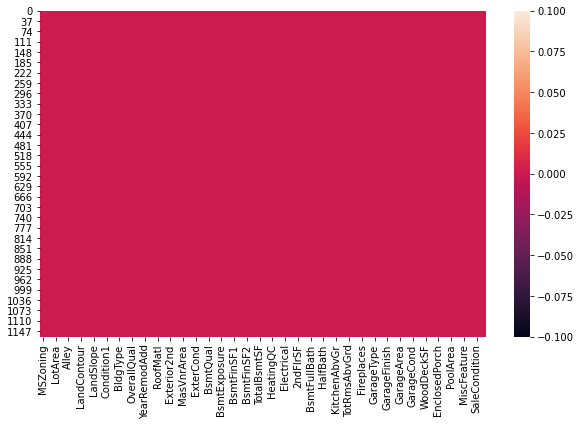

In [372]:
#visualisation
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

# EDA

### Statistical Summary

Now lets understand our data statistically

In [240]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1168.0,70.988470,22.437056,21.0,60.00,70.988470,79.25,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.500000,11515.50,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.000000,7.00,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.000000,2000.00,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.000000,2004.00,2010.0
MasVnrArea,1168.0,102.310078,182.047152,0.0,0.00,0.000000,160.00,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.500000,714.50,5644.0
BsmtFinSF2,1168.0,46.647260,163.520016,0.0,0.00,0.000000,0.00,1474.0


Observation:

1.Std is greater than mean for some features such as LowQualFinSF,PoolArea etc which means data is widely spread & indicate the presence of skewness.

2.There is large difference between maxm value and 75% ,which means that outliers are present .

3.MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,LowQualFinSF,BsmtFullBath,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal have outliers

In [241]:
# Describing object types
df.describe(include='object').T


,count,unique,top,freq
MSZoning,1168,5,RL,928
Street,1168,2,Pave,1164
Alley,1168,3,No_alley_access,1091
LotShape,1168,4,Reg,740
LandContour,1168,4,Lvl,1046
Utilities,1168,1,AllPub,1168
LotConfig,1168,5,Inside,842
LandSlope,1168,3,Gtl,1105
Neighborhood,1168,25,NAmes,182
Condition1,1168,9,Norm,1005


We observe that Utilities seems to have only one unique value = 'Allpub'.Therefore we can drop it.

In [242]:
#Removing irrelevant features6
df.drop(["Utilities"],axis=1,inplace=True)

# Check Correlation

In [243]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.336681,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027813,-0.052236,-0.062403,...,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.336681,1.000000,0.299452,0.229218,-0.047573,0.112655,0.088799,0.188758,0.228996,0.002159,...,0.088334,0.151328,0.020902,0.051084,0.030405,0.196001,-0.001329,0.022517,-0.003885,0.323779
LotArea,-0.124151,0.299452,1.000000,0.107188,0.017513,0.005506,0.027228,0.121086,0.221851,0.056656,...,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,0.070462,0.229218,0.107188,1.000000,-0.083167,0.575800,0.555945,0.407230,0.219643,-0.040893,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,-0.056978,-0.047573,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137475,-0.028810,0.044336,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,0.023988,0.112655,0.005506,0.575800,-0.377731,1.000000,0.592829,0.321905,0.227933,-0.027682,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,0.056618,0.088799,0.027228,0.555945,0.080669,0.592829,1.000000,0.181385,0.114430,-0.044694,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,0.027813,0.188758,0.121086,0.407230,-0.137475,0.321905,0.181385,1.000000,0.265735,-0.065707,...,0.151579,0.130885,-0.101941,0.018720,0.046498,0.013590,-0.027582,0.013363,-0.013462,0.463626
BsmtFinSF1,-0.052236,0.228996,0.221851,0.219643,-0.028810,0.227933,0.114430,0.265735,1.000000,-0.052145,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874
BsmtFinSF2,-0.062403,0.002159,0.056656,-0.040893,0.044336,-0.027682,-0.044694,-0.065707,-0.052145,1.000000,...,0.094690,-0.014103,0.032081,-0.031263,0.076561,0.045990,0.007915,-0.014605,0.038438,-0.010151


<AxesSubplot:>

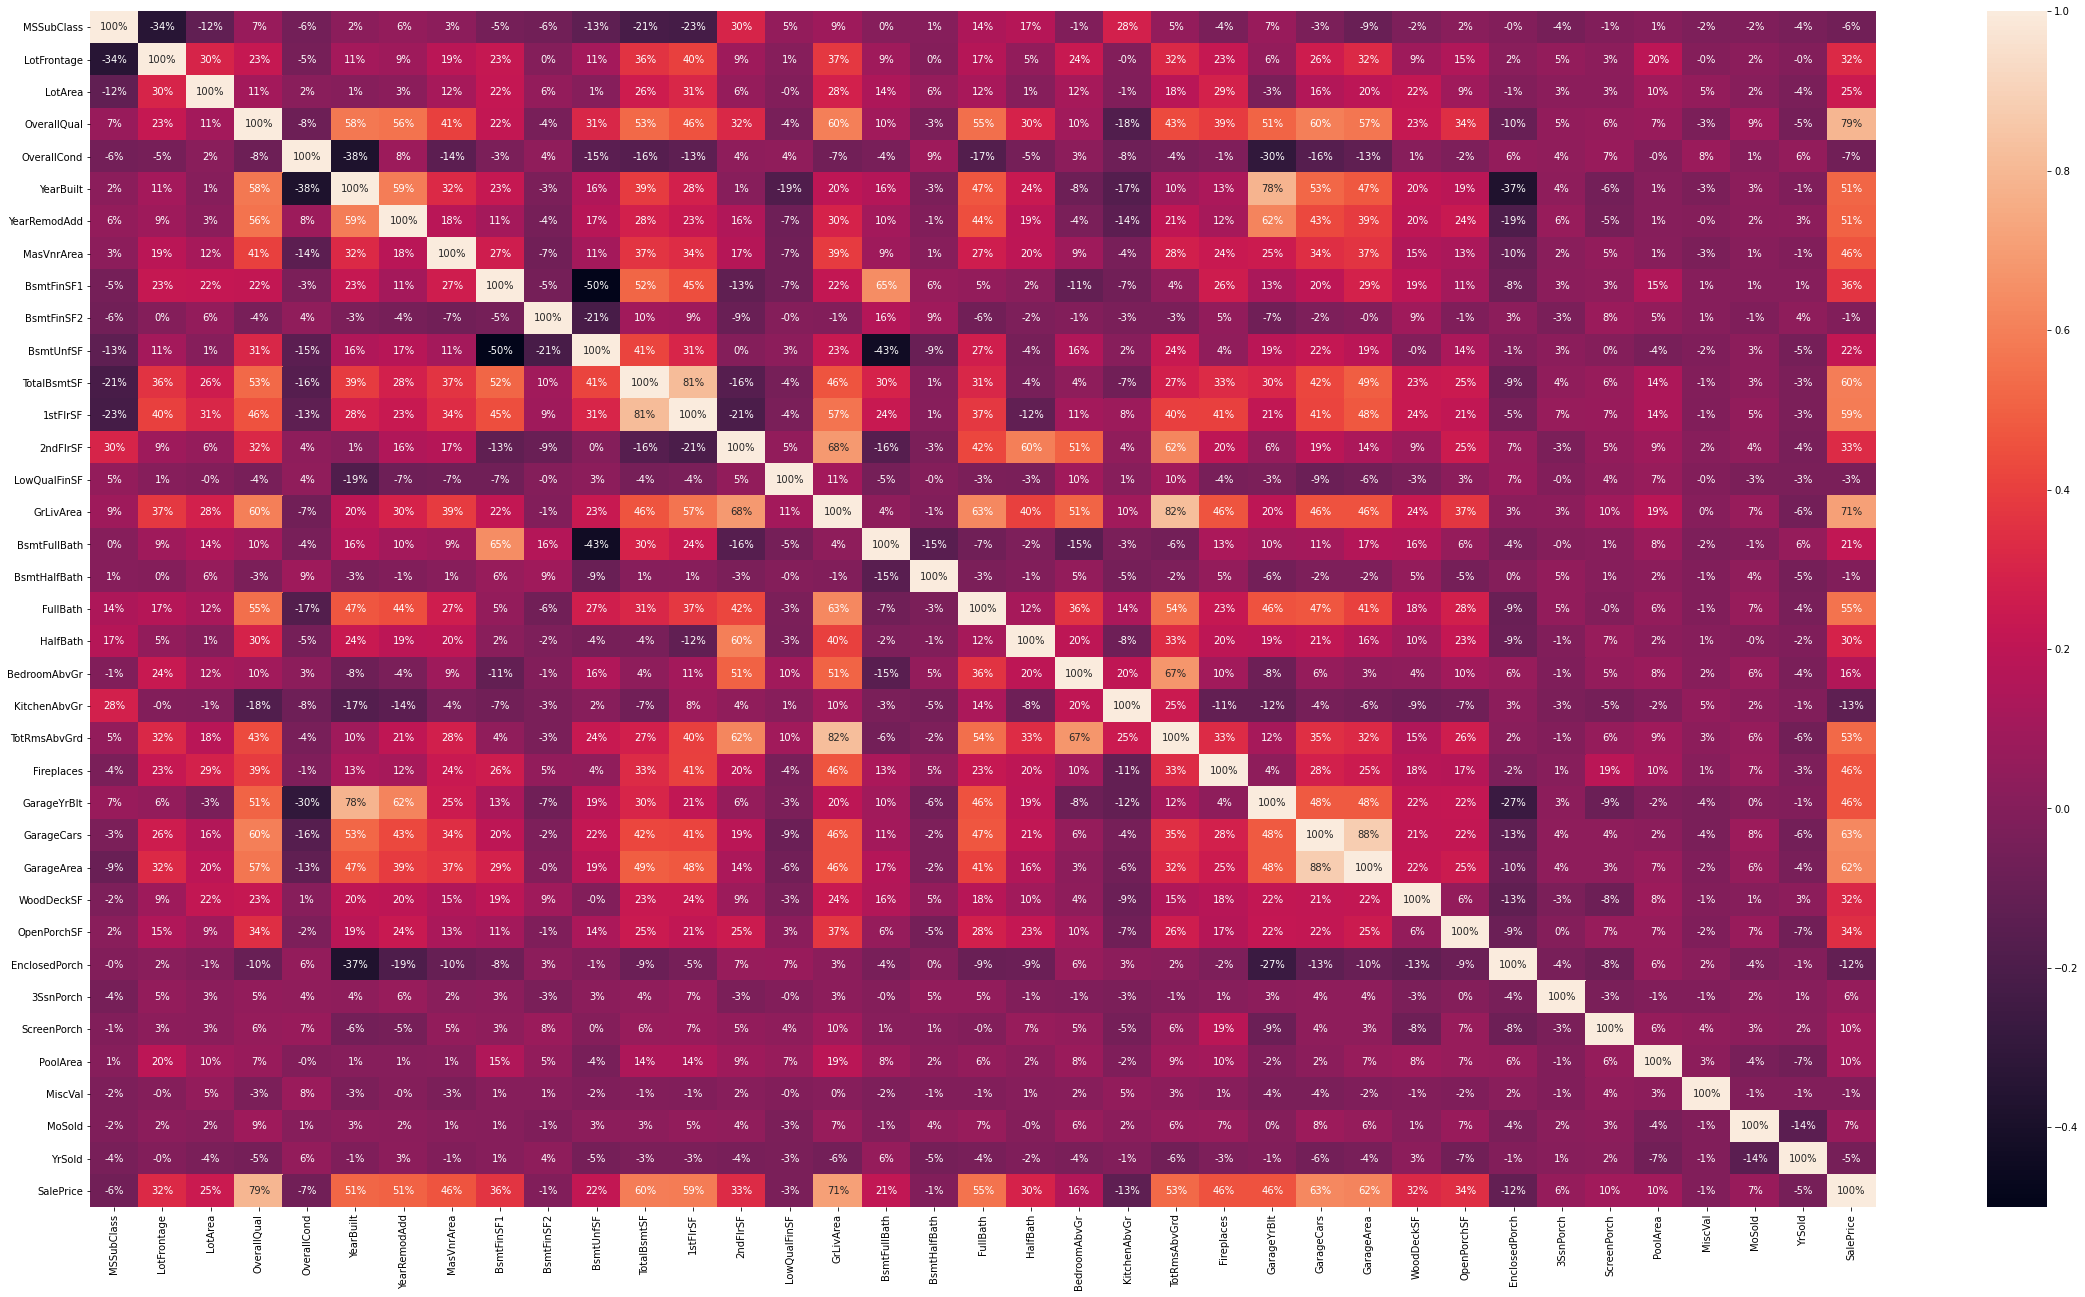

In [244]:
plt.figure(figsize=(40,22))
sns.heatmap(df.corr(),fmt='.0%',annot=True)

##### Correlation with target column

Text(0.5, 1.0, 'correlation with target variable')

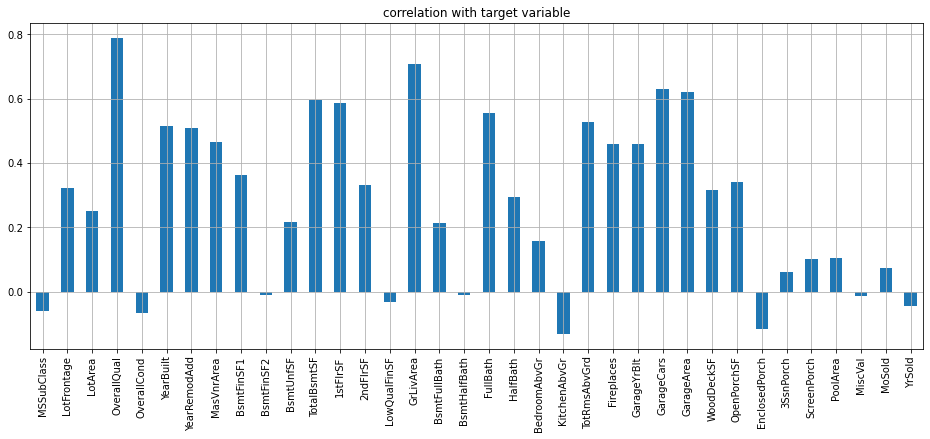

In [245]:
plt.figure(figsize=(16,6))
df.drop('SalePrice',axis=1).corrwith(df['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title('correlation with target variable')

Observation

1. 'MSSubClass' ,'OverallCond' ,'OverallCond' ,'LowQualFinSF'  ,'BsmtHalfBath' ,'KitchenAbvGr' ,'YrSold', 'EnclosedPorch', 'MiscVal' are negatively correlated with the target column,rest all are positively correlated

2. 'OverallQual' & 'GrLivArea' are highly positively correlated with target column

3. 'MSSubClass' ,'OverallCond' ,'OverallCond' ,'LowQualFinSF'  ,'BsmtHalfBath'  ,'YrSold', 'MiscVal', 'MoSold', '3SsnPorch' are least correlated with the target column 

In [246]:
#dropping least correlated column
df.drop(['MSSubClass' ,'OverallCond' ,'OverallCond' ,'LowQualFinSF' ,'BsmtHalfBath' ,'YrSold', 'MiscVal', 'MoSold', '3SsnPorch'],axis=1,inplace=True)

# Data Visualization

#### Univariate analysis

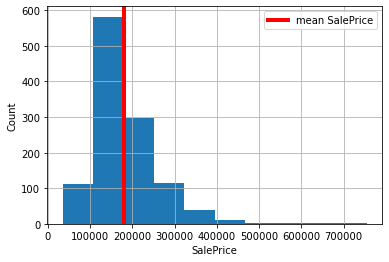

In [247]:
#checking the mean saale price
fees=df['SalePrice'].hist()
mean_val=np.mean(df['SalePrice'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.legend()
plt.show()

From above,we find that mean sale price is around 190000

In [248]:
#creating new categorical and cont variable list and label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
categorical=[x for x in df.columns if df[x].dtype==object]
cont=[x for x in df.columns if x not in categorical]

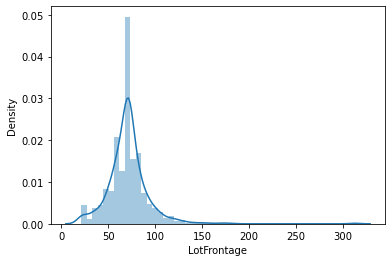

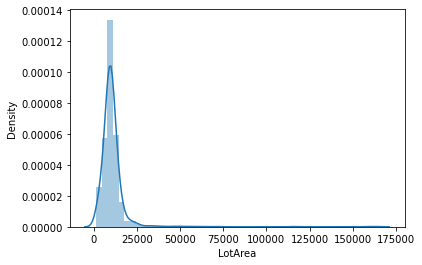

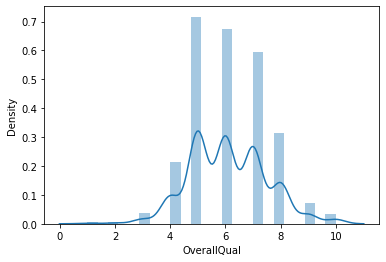

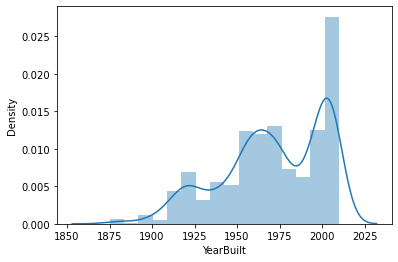

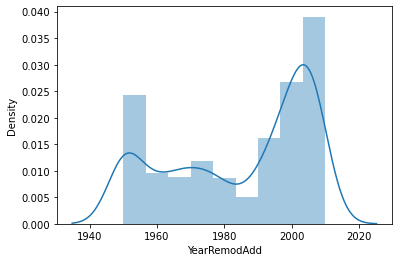

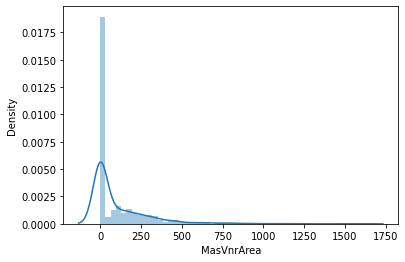

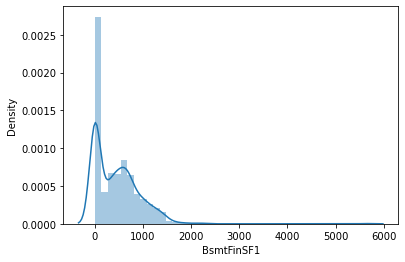

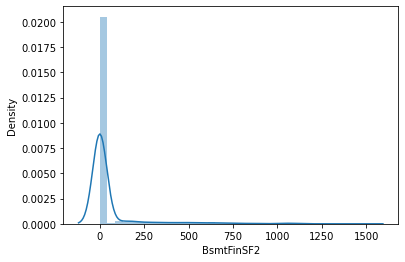

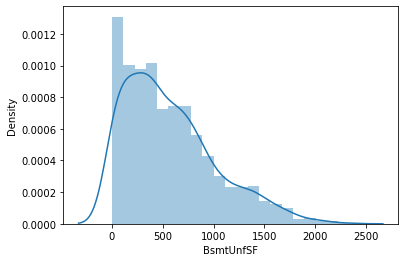

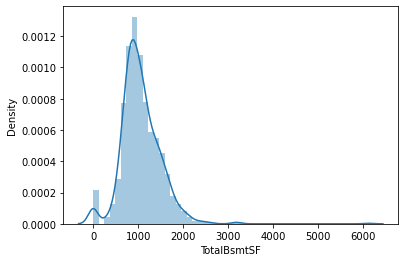

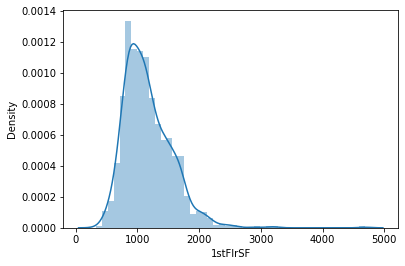

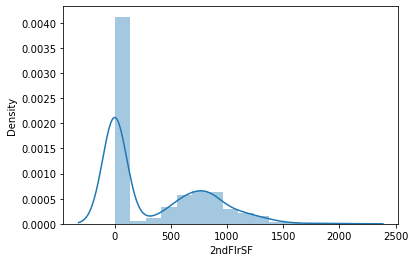

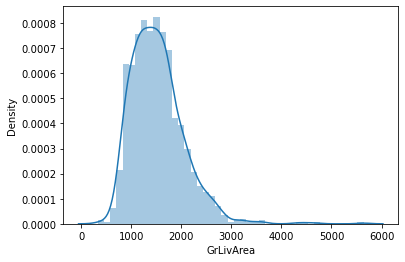

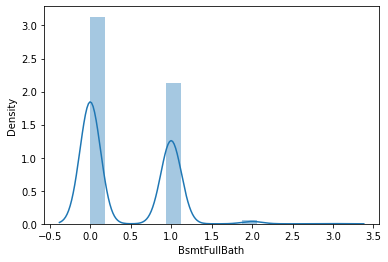

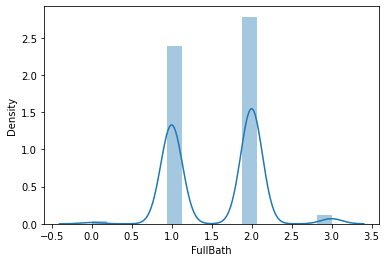

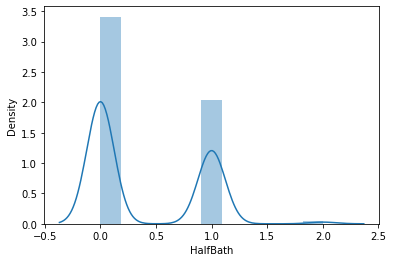

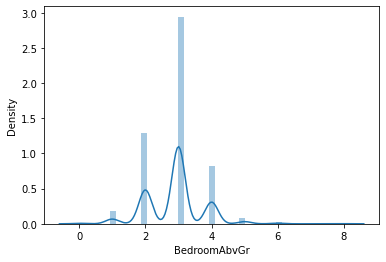

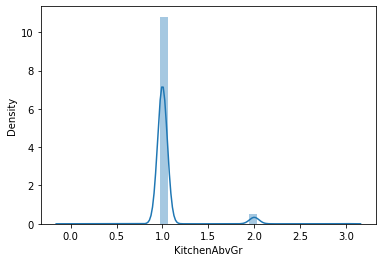

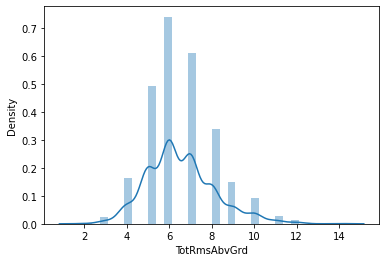

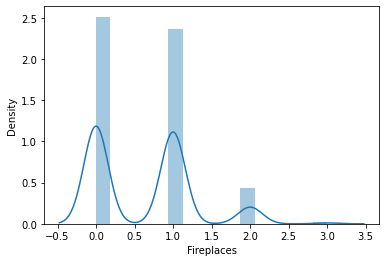

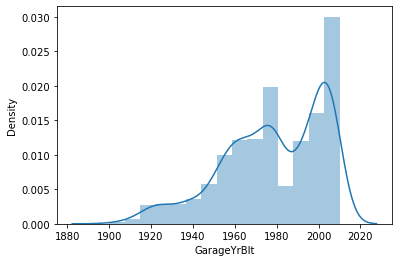

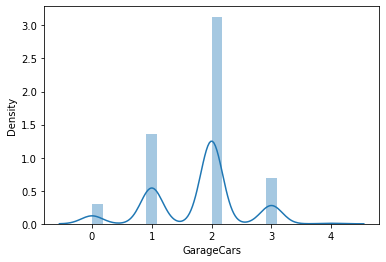

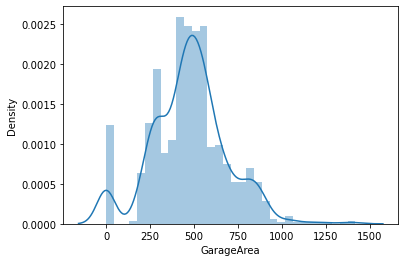

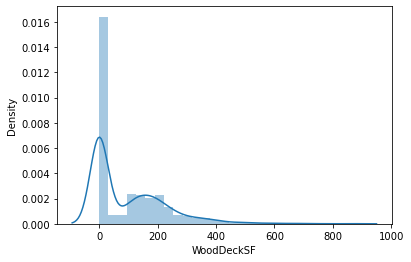

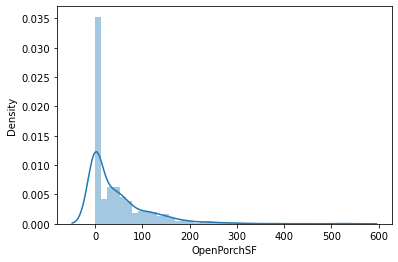

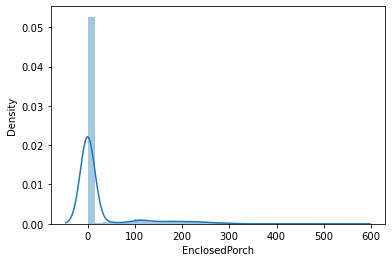

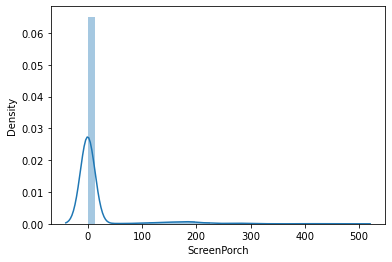

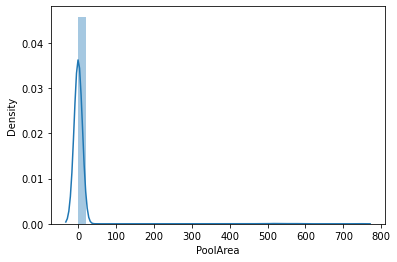

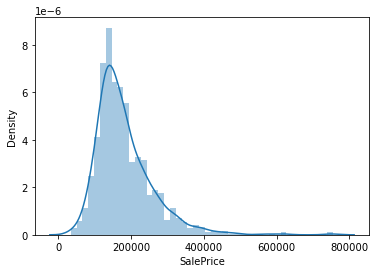

In [249]:
#getting distribution o data in continuous columns
for i in cont:
    plt.figure(figsize=(6,4))
    sns.distplot(df[i])
    plt.show()


### observation from above distribution plot

1. LotFrontage,LotArea is almost normally distributed

2. MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,saleprice is right skewed

3. LotArea,MiscVal,PoolArea,3SsnPorch is leptokurtic

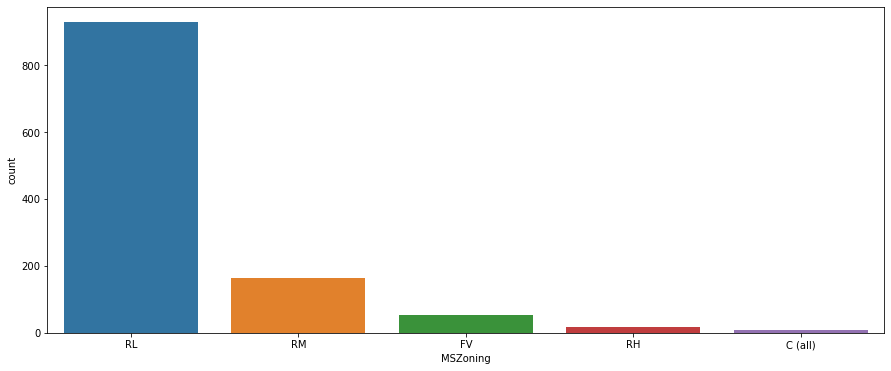

RL         79.0
RM         14.0
FV          4.0
RH          1.0
C (all)     1.0
Name: MSZoning, dtype: float64 2


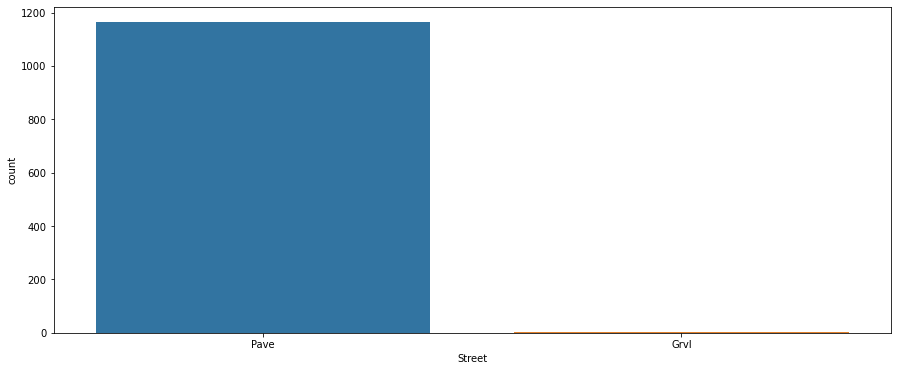

Pave    100.0
Grvl      0.0
Name: Street, dtype: float64 2


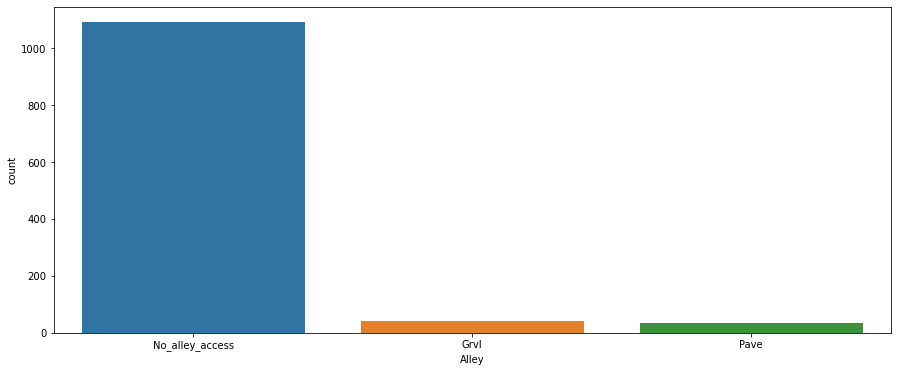

No_alley_access    93.0
Grvl                4.0
Pave                3.0
Name: Alley, dtype: float64 2


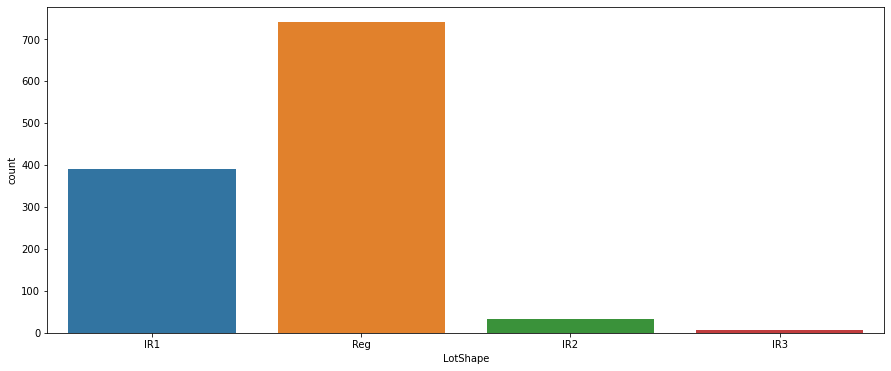

Reg    63.0
IR1    33.0
IR2     3.0
IR3     1.0
Name: LotShape, dtype: float64 2


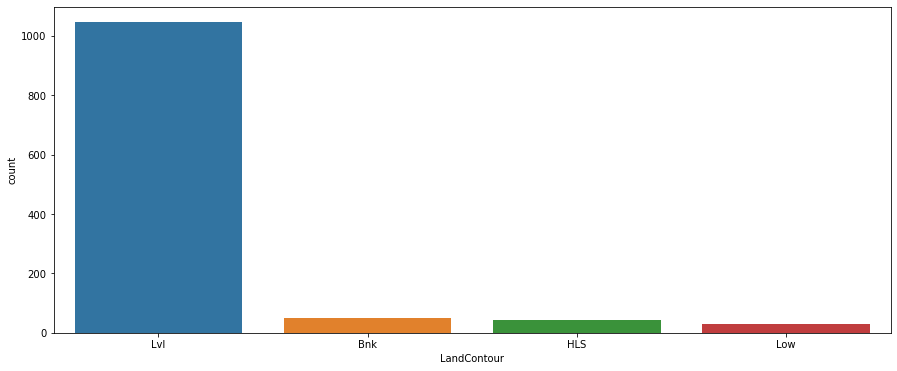

Lvl    90.0
Bnk     4.0
HLS     4.0
Low     3.0
Name: LandContour, dtype: float64 2


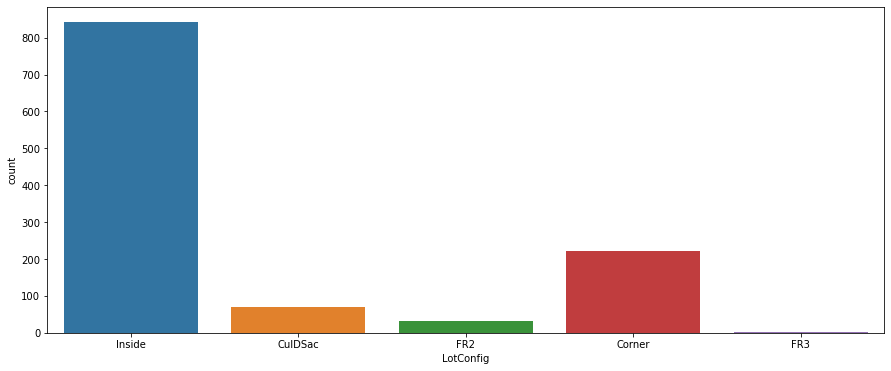

Inside     72.0
Corner     19.0
CulDSac     6.0
FR2         3.0
FR3         0.0
Name: LotConfig, dtype: float64 2


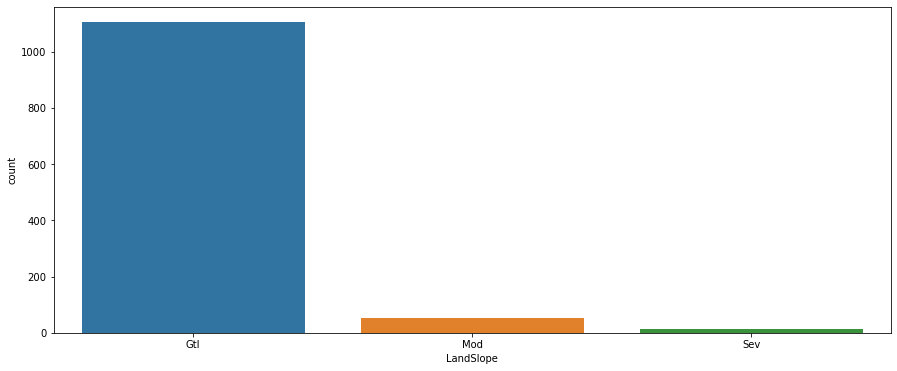

Gtl    95.0
Mod     4.0
Sev     1.0
Name: LandSlope, dtype: float64 2


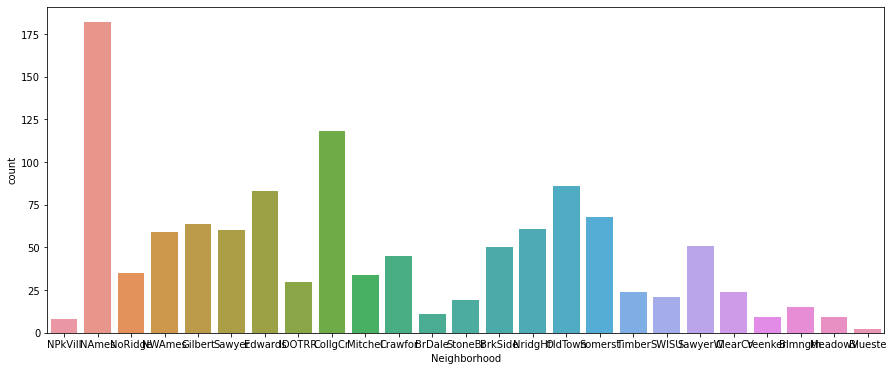

NAmes      16.0
CollgCr    10.0
OldTown     7.0
Edwards     7.0
Somerst     6.0
Gilbert     5.0
NridgHt     5.0
Sawyer      5.0
NWAmes      5.0
SawyerW     4.0
BrkSide     4.0
Crawfor     4.0
NoRidge     3.0
Mitchel     3.0
IDOTRR      3.0
ClearCr     2.0
Timber      2.0
SWISU       2.0
StoneBr     2.0
Blmngtn     1.0
BrDale      1.0
MeadowV     1.0
Veenker     1.0
NPkVill     1.0
Blueste     0.0
Name: Neighborhood, dtype: float64 2


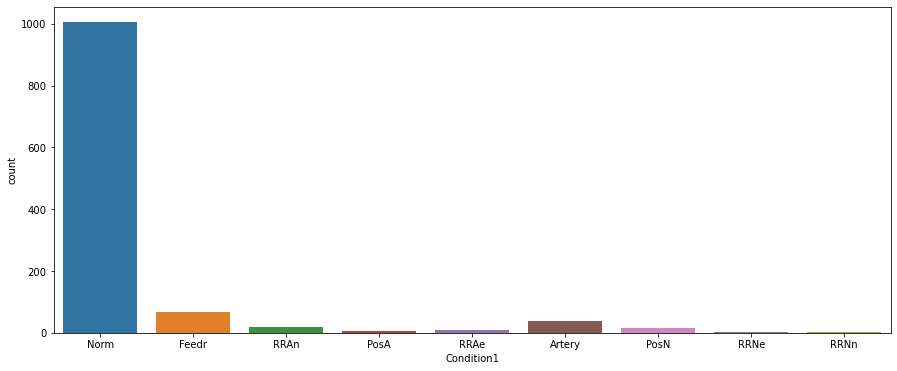

Norm      86.0
Feedr      6.0
Artery     3.0
RRAn       2.0
PosN       1.0
RRAe       1.0
PosA       1.0
RRNn       0.0
RRNe       0.0
Name: Condition1, dtype: float64 2


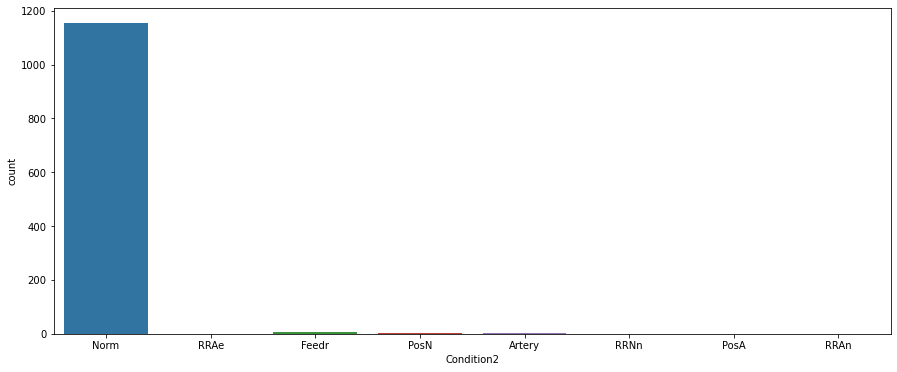

Norm      99.0
Feedr      1.0
Artery     0.0
PosN       0.0
RRNn       0.0
RRAe       0.0
PosA       0.0
RRAn       0.0
Name: Condition2, dtype: float64 2


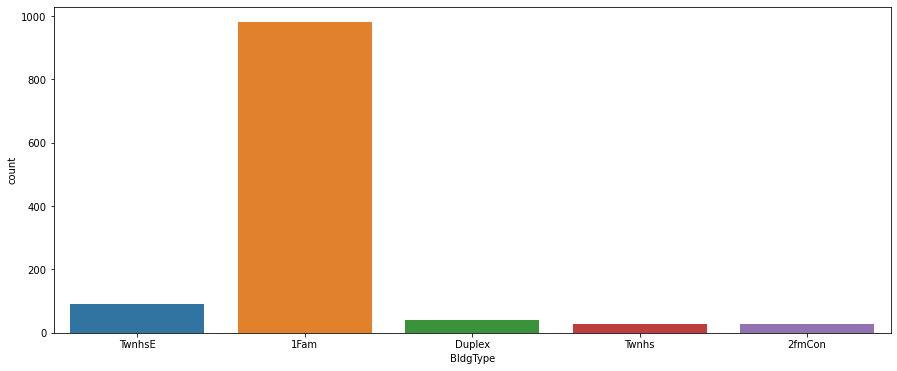

1Fam      84.0
TwnhsE     8.0
Duplex     4.0
Twnhs      2.0
2fmCon     2.0
Name: BldgType, dtype: float64 2


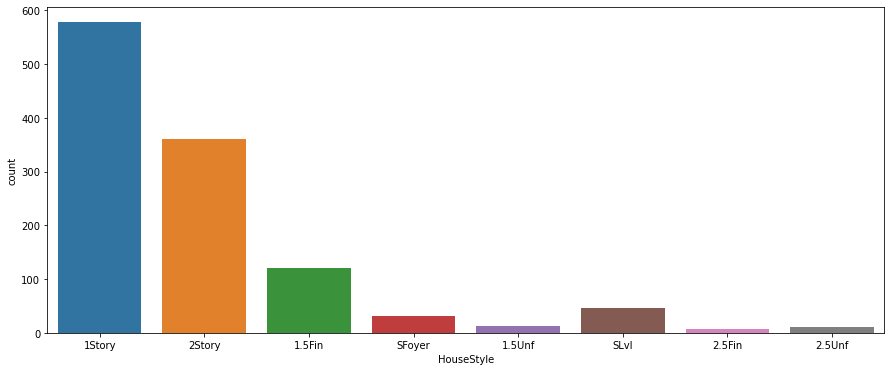

1Story    49.0
2Story    31.0
1.5Fin    10.0
SLvl       4.0
SFoyer     3.0
1.5Unf     1.0
2.5Unf     1.0
2.5Fin     1.0
Name: HouseStyle, dtype: float64 2


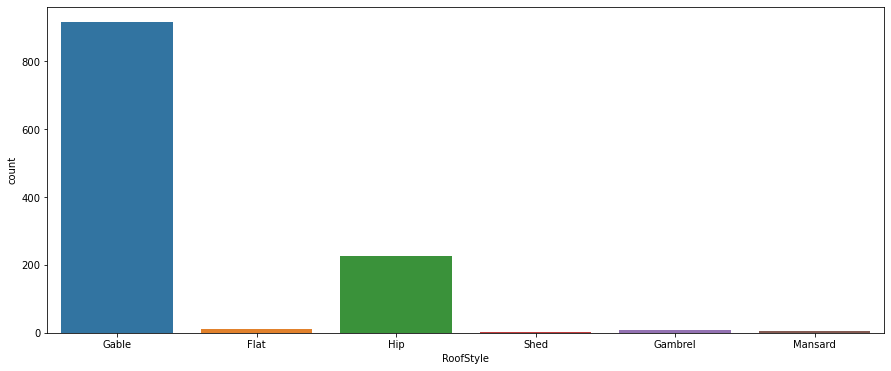

Gable      78.0
Hip        19.0
Flat        1.0
Gambrel     1.0
Mansard     0.0
Shed        0.0
Name: RoofStyle, dtype: float64 2


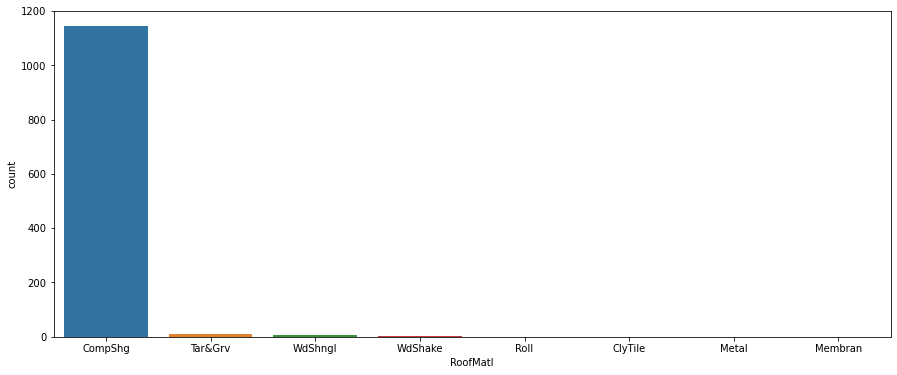

CompShg    98.0
Tar&Grv     1.0
WdShngl     1.0
WdShake     0.0
Membran     0.0
ClyTile     0.0
Metal       0.0
Roll        0.0
Name: RoofMatl, dtype: float64 2


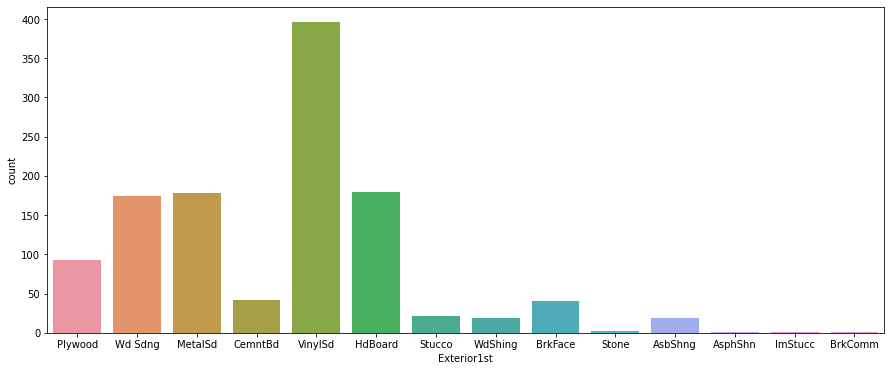

VinylSd    34.0
HdBoard    15.0
MetalSd    15.0
Wd Sdng    15.0
Plywood     8.0
CemntBd     4.0
BrkFace     4.0
Stucco      2.0
WdShing     2.0
AsbShng     2.0
Stone       0.0
ImStucc     0.0
AsphShn     0.0
BrkComm     0.0
Name: Exterior1st, dtype: float64 2


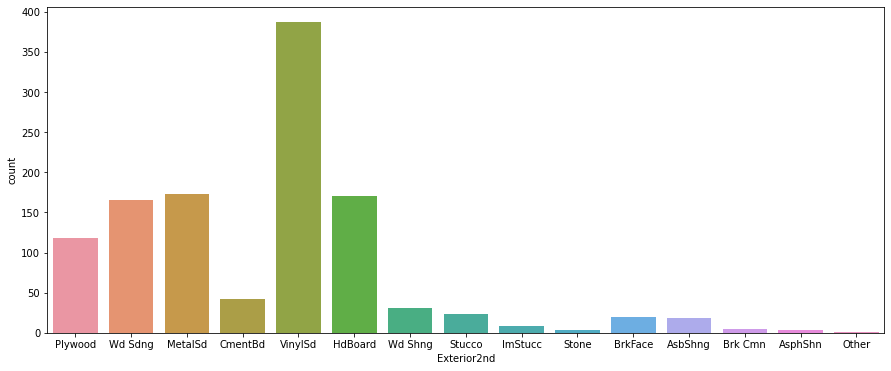

VinylSd    33.0
MetalSd    15.0
HdBoard    15.0
Wd Sdng    14.0
Plywood    10.0
CmentBd     4.0
Wd Shng     3.0
Stucco      2.0
BrkFace     2.0
AsbShng     2.0
ImStucc     1.0
Brk Cmn     0.0
Stone       0.0
AsphShn     0.0
Other       0.0
Name: Exterior2nd, dtype: float64 2


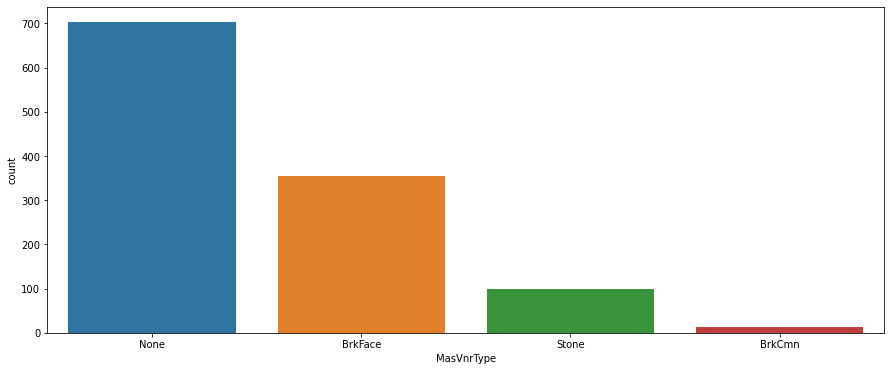

None       60.0
BrkFace    30.0
Stone       8.0
BrkCmn      1.0
Name: MasVnrType, dtype: float64 2


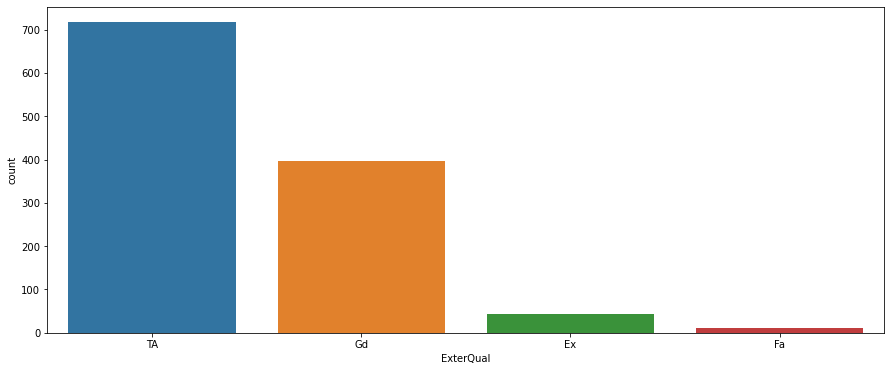

TA    61.0
Gd    34.0
Ex     4.0
Fa     1.0
Name: ExterQual, dtype: float64 2


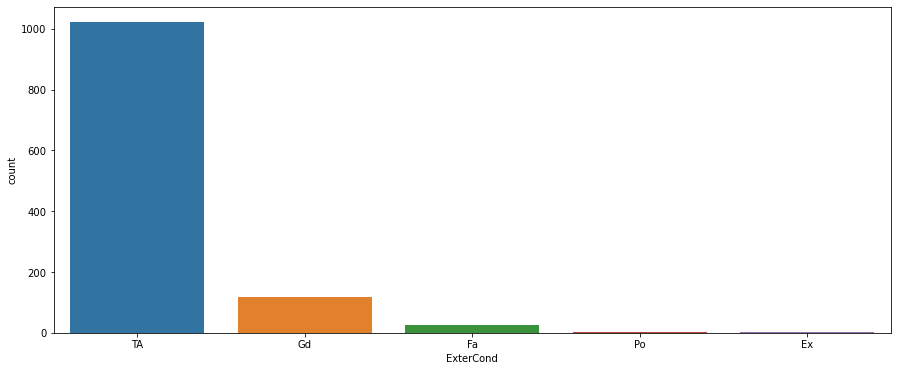

TA    88.0
Gd    10.0
Fa     2.0
Ex     0.0
Po     0.0
Name: ExterCond, dtype: float64 2


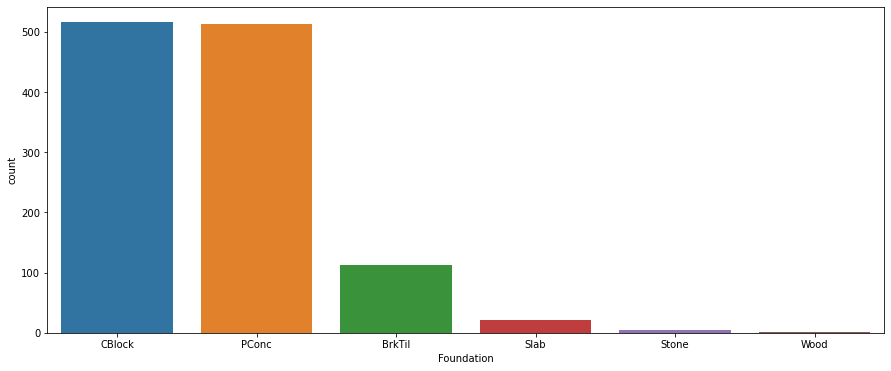

CBlock    44.0
PConc     44.0
BrkTil    10.0
Slab       2.0
Stone      0.0
Wood       0.0
Name: Foundation, dtype: float64 2


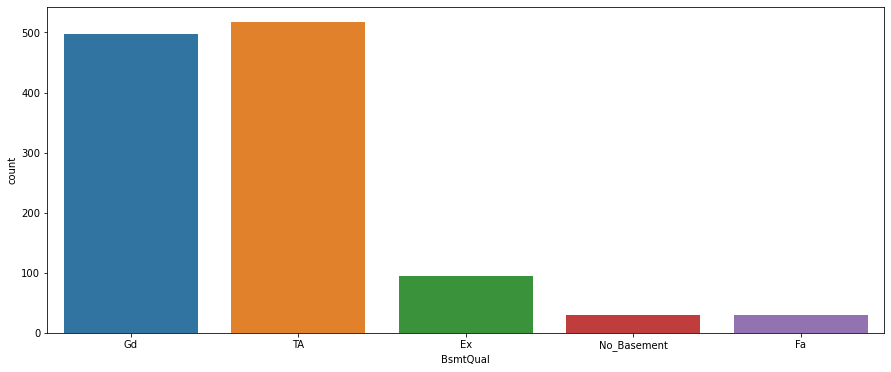

TA             44.0
Gd             43.0
Ex              8.0
No_Basement     3.0
Fa              2.0
Name: BsmtQual, dtype: float64 2


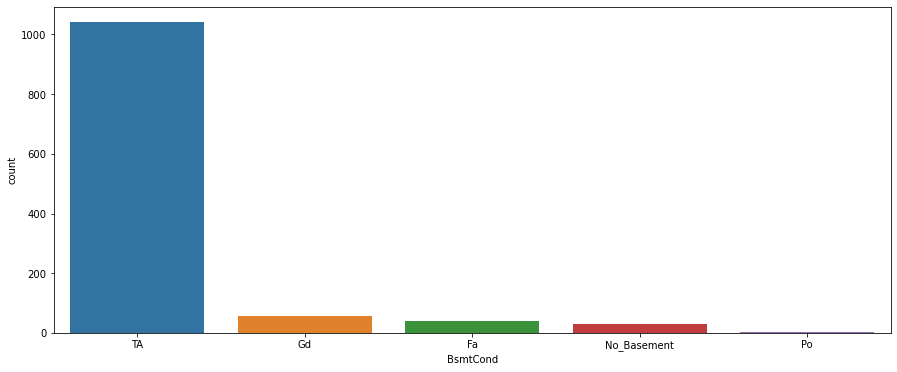

TA             89.0
Gd              5.0
Fa              3.0
No_Basement     3.0
Po              0.0
Name: BsmtCond, dtype: float64 2


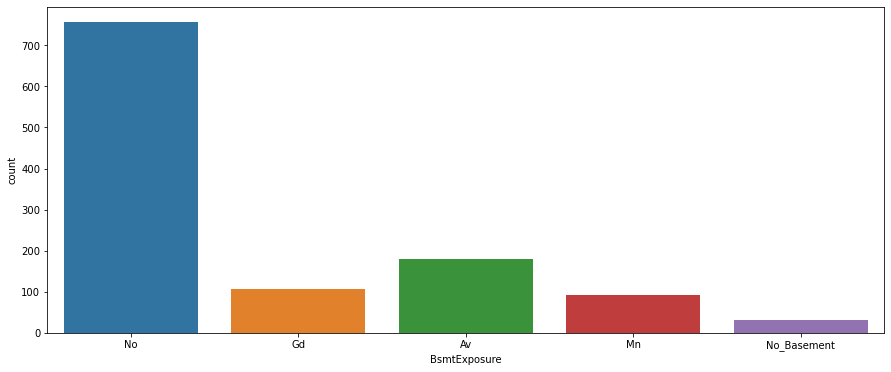

No             65.0
Av             15.0
Gd              9.0
Mn              8.0
No_Basement     3.0
Name: BsmtExposure, dtype: float64 2


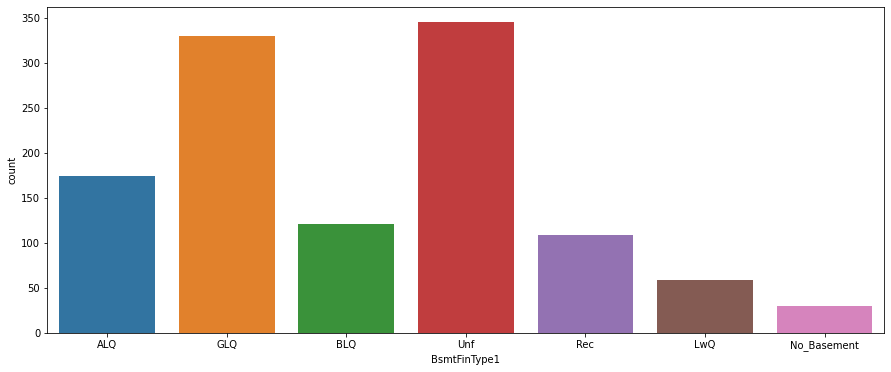

Unf            30.0
GLQ            28.0
ALQ            15.0
BLQ            10.0
Rec             9.0
LwQ             5.0
No_Basement     3.0
Name: BsmtFinType1, dtype: float64 2


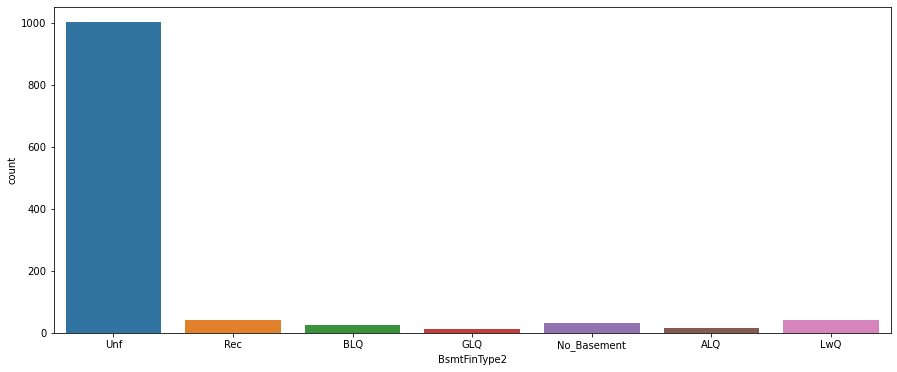

Unf            86.0
Rec             4.0
LwQ             3.0
No_Basement     3.0
BLQ             2.0
ALQ             1.0
GLQ             1.0
Name: BsmtFinType2, dtype: float64 2


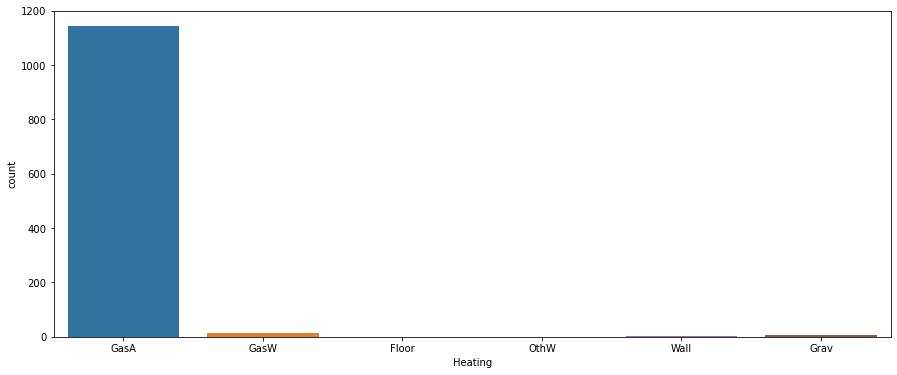

GasA     98.0
GasW      1.0
Grav      0.0
Wall      0.0
Floor     0.0
OthW      0.0
Name: Heating, dtype: float64 2


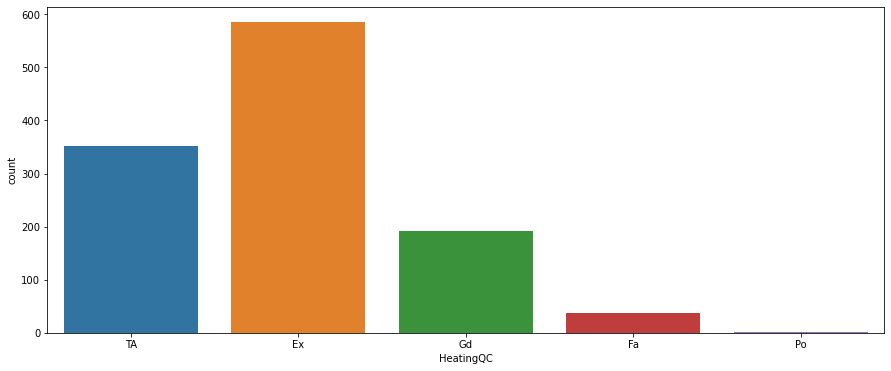

Ex    50.0
TA    30.0
Gd    16.0
Fa     3.0
Po     0.0
Name: HeatingQC, dtype: float64 2


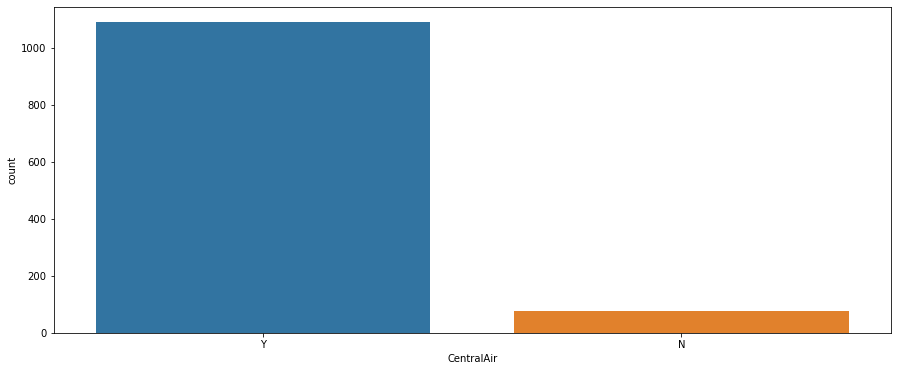

Y    93.0
N     7.0
Name: CentralAir, dtype: float64 2


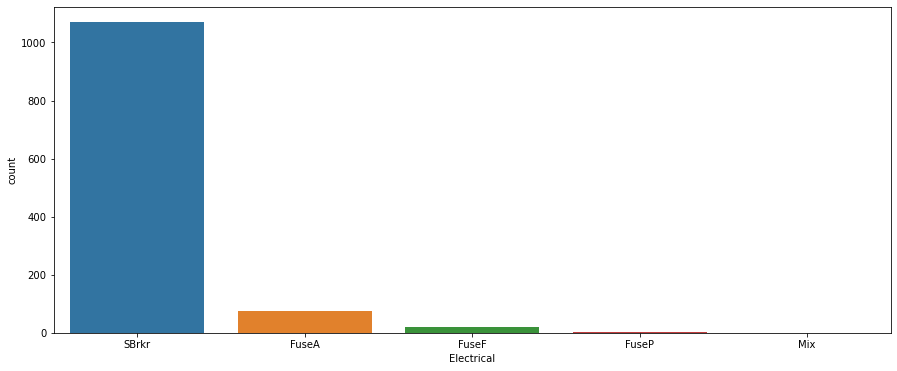

SBrkr    92.0
FuseA     6.0
FuseF     2.0
FuseP     0.0
Mix       0.0
Name: Electrical, dtype: float64 2


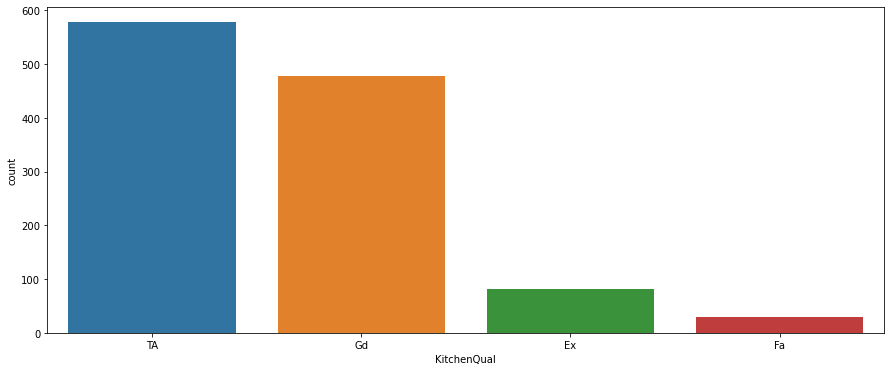

TA    49.0
Gd    41.0
Ex     7.0
Fa     3.0
Name: KitchenQual, dtype: float64 2


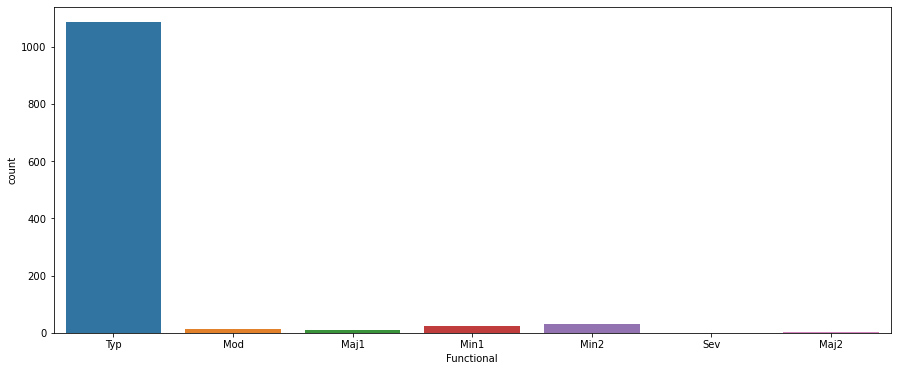

Typ     93.0
Min2     3.0
Min1     2.0
Mod      1.0
Maj1     1.0
Maj2     0.0
Sev      0.0
Name: Functional, dtype: float64 2


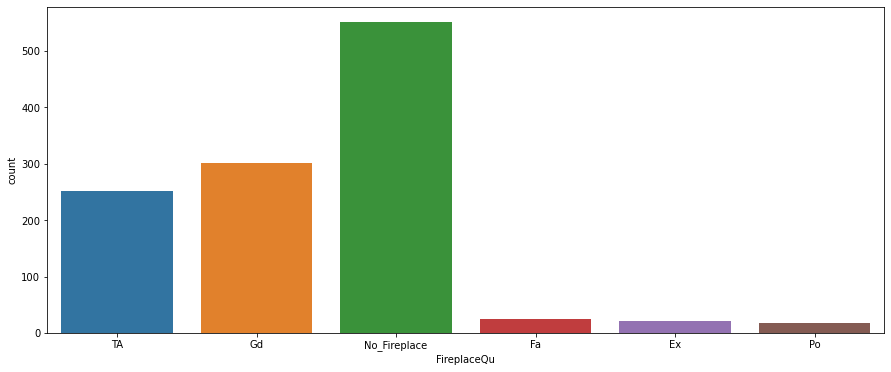

No_Fireplace    47.0
Gd              26.0
TA              22.0
Fa               2.0
Ex               2.0
Po               2.0
Name: FireplaceQu, dtype: float64 2


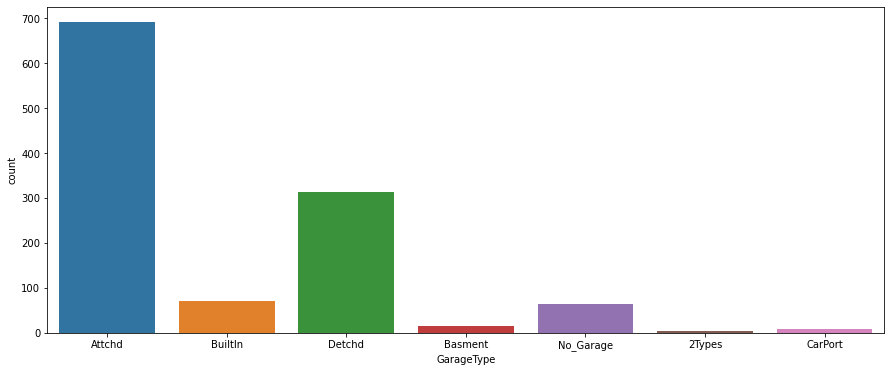

Attchd       59.0
Detchd       27.0
BuiltIn       6.0
No_Garage     5.0
Basment       1.0
CarPort       1.0
2Types        0.0
Name: GarageType, dtype: float64 2


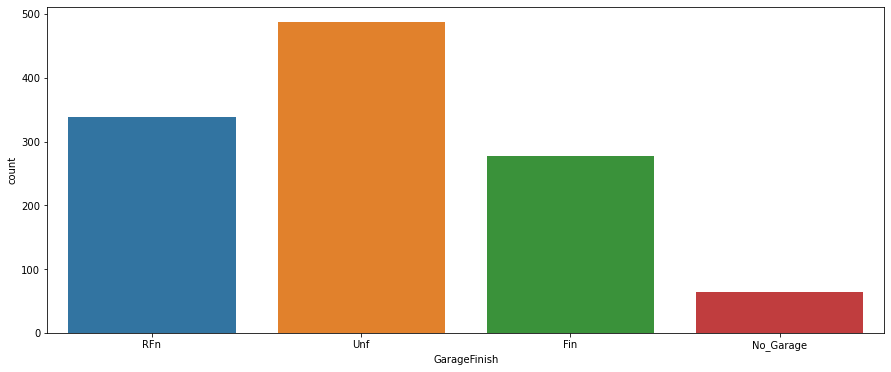

Unf          42.0
RFn          29.0
Fin          24.0
No_Garage     5.0
Name: GarageFinish, dtype: float64 2


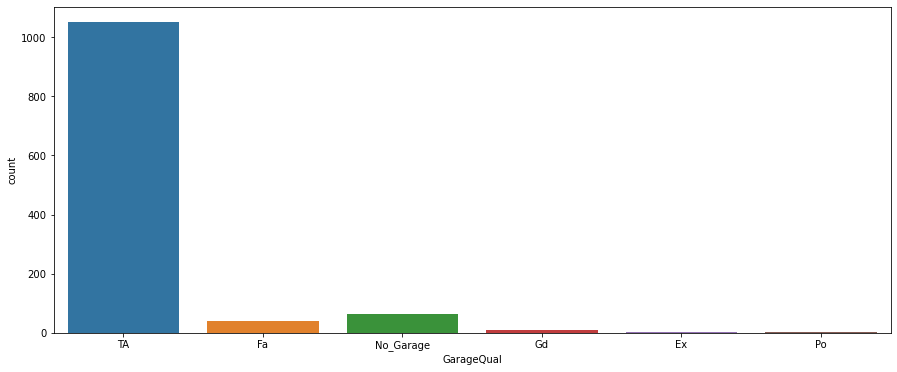

TA           90.0
No_Garage     5.0
Fa            3.0
Gd            1.0
Po            0.0
Ex            0.0
Name: GarageQual, dtype: float64 2


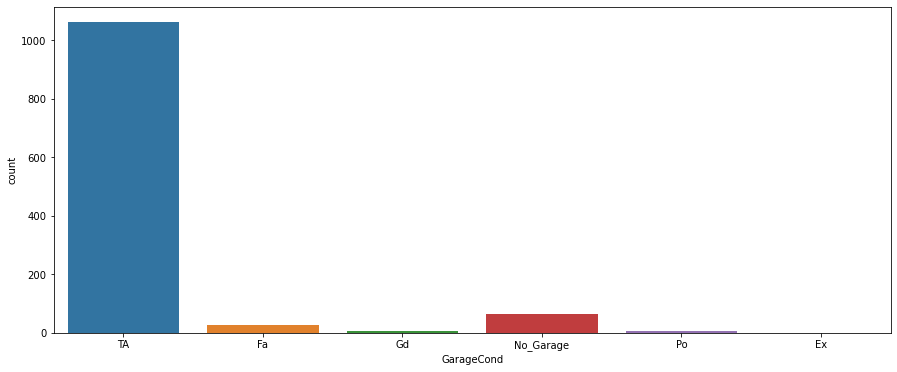

TA           91.0
No_Garage     5.0
Fa            2.0
Gd            1.0
Po            1.0
Ex            0.0
Name: GarageCond, dtype: float64 2


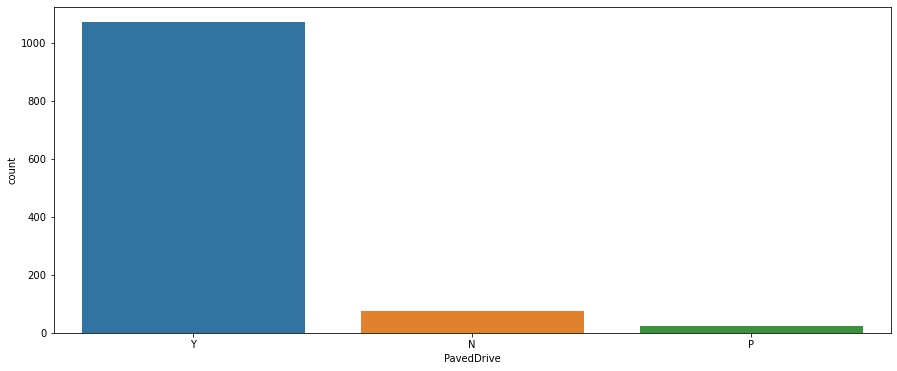

Y    92.0
N     6.0
P     2.0
Name: PavedDrive, dtype: float64 2


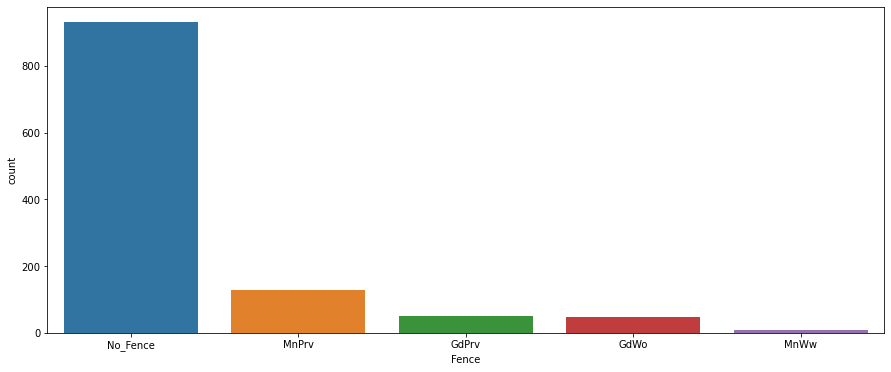

No_Fence    80.0
MnPrv       11.0
GdPrv        4.0
GdWo         4.0
MnWw         1.0
Name: Fence, dtype: float64 2


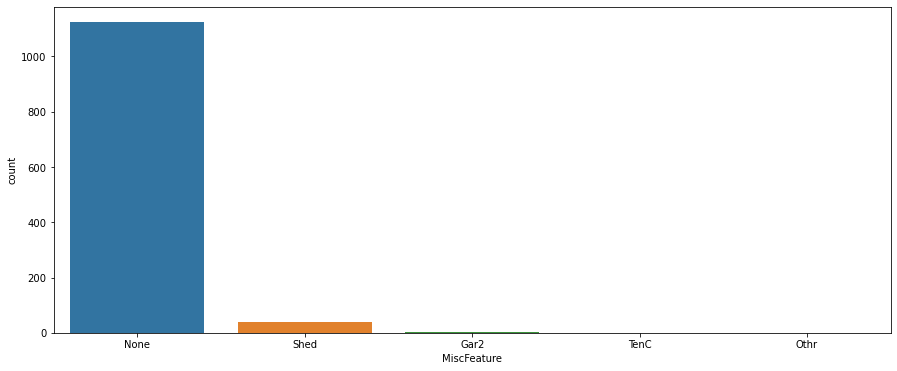

None    96.0
Shed     3.0
Gar2     0.0
Othr     0.0
TenC     0.0
Name: MiscFeature, dtype: float64 2


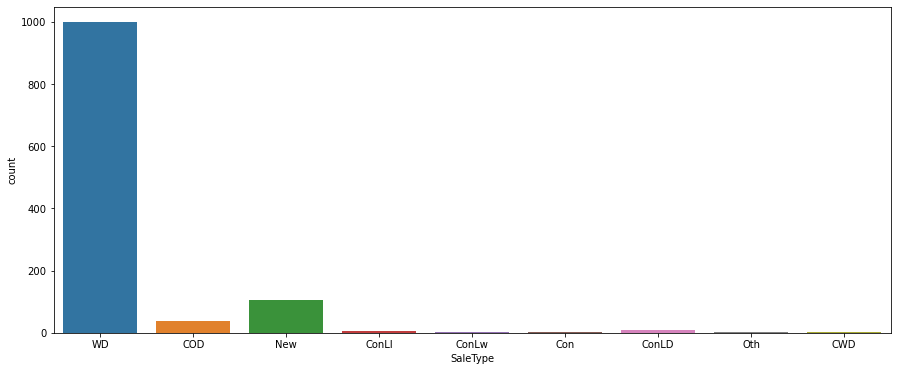

WD       86.0
New       9.0
COD       3.0
ConLD     1.0
ConLI     0.0
ConLw     0.0
CWD       0.0
Oth       0.0
Con       0.0
Name: SaleType, dtype: float64 2


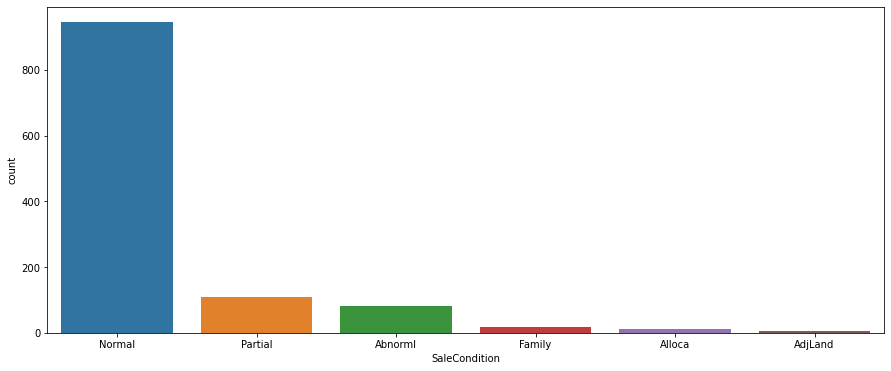

Normal     81.0
Partial     9.0
Abnorml     7.0
Family      2.0
Alloca      1.0
AdjLand     0.0
Name: SaleCondition, dtype: float64 2


In [250]:
#visualizing each categorical column wrt count of each value
for i in categorical:
    plt.figure(figsize=(15,6))
    sns.countplot(df[i])
    plt.show()
#checking percentage of data classification in each string attribute
    print(round(df[i].value_counts()/1168*100),2)
    
    

### Observation from all the count plot

1. looking at countplot of  MSZoning ,which Identifies the general zoning classification of the sale,we find that 79 % of houses were sold in Low density resedential Areas

2. For street ,which states:Type of road access to property,we observe that almost 100% of house which were sold
had access to paved roads so we can consider that no houses were purchased which had gravel road access

3. For Alley,93% of the purchased house do not have access to alley.Only 4% have gravel & 3% have paved alley

4. LotShape : 63% of the sold property  was of Regular shape followed by slightly irregular type (33%).It means Australian gives priority to regular shaped houses


5. LandContour :90% of sold houses were neary flat level

6. LotConfig : 72% of purchased houses had Inside lot of the property

7. LandSlope :Around 95% of the sold property had gentle slope

8. Neighborhood: Physical locations within Ames city limits-:highest 16% of purhcased houses has neighbourhood of NWAmes(Northwest Ames) followed by CollgCr(College Creek) and least houses were purchased in neighbour hood of Bluestem

9. Condition1: Proximity to various conditions-:86% of purchased houses had normal proximity to various conditions1 and least 0.00 had RRne,RRNn proximity

10. Condition2: Proximity to various conditions (if more than one is present)-:99% of purchased houses had normal proximity to various conditions2

11. BldgType: Type of dwelling-:84% purchased houses were single family detached,followed by 8% 2FmCon(Two-family Conversion)

12. HouseStyle: Style of dwelling-:49% houses had 1story followed by 2story style (31%)

13. RoofStyle: Type of roof-:78% of houses have Gable roof style and 19% have Hip roof style

14. RoofMatl: Roof material-:98% houses have  CompShg(Standard (Composite) Shingle) roof material

15. Exterior1st: Exterior covering on house-:34% houses have Vinylsiding covering on exteriors 15% have hard board and metal siding
    


16. Exterior2nd: Exterior covering on house (if more than one material)-:33% houses have VinylSd(Vinyl Siding) 15% have hard board and metal siding

17. MasVnrType: Masonry veneer type-:60% of houses have no masonry veneer type followed by BrkFace(Brick Face) (30%)

18. ExterQual: Evaluates the quality of the material on the exterior-:61% of the sold hoUse have TA(Average/Typical) quality material on exterior followed by Gd(Good) 34%

19. ExterCond: Evaluates the present condition of the material on the exterior-:88% houses are currently in TA(average) condition of exterior material

20. Foundation: Type of foundation-:44% houses have foundation  CBlock(Cinder Block) & 44% have PConc(Poured Contrete)

21. BsmtQual: Evaluates the height of the basement-:44% of houses have TA(typical) (80-89 inches) basement height followed by  Gd(Good) (90-99 inches)

22. BsmtCond: Evaluates the general condition of the basement-:89% of houses have TA(Typical - slight dampness allowed) basment 

23. BsmtExposure: Refers to walkout or garden level walls-:64% of houses have  No(No Exposure) followed by Av(Average Exposure ) 15%

24. BsmtFinType1: Rating of basement finished area-:(30%) have Unf(Unfinshed) basement area and 28% comes under GLQ(good living quarters)

25. Heating: Type of heating-:98% houses have GasA(Gas forced warm air furnace) heating type

26.  HeatingQC: Heating quality and condition-:30% houses have average quality heating

27. CentralAir: Central air conditioning-:93% houses are central air


28. Electrical: Electrical system-:92% houses have SbrKr(Standard Circuit Breakers & Romex) type of electrical systems

29. KitchenQual: Kitchen quality-:49% houses have average (TA) kitchen quality

30. Functional: Home functionality (Assume typical unless deductions are warranted)-:92% houses have typical (TA) home functionality

31. FireplaceQu: Fireplace quality-:47% of the houses donot have fireplace,25% houses have Gd(Good - Masonry Fireplace in main level) FireplaceQuality

32. GarageType: Garage location-:57% houses have Attached garage type,while 29% have Detchd(Detached from home)

33. GarageFinish: Interior finish of the garage:42% of houses have unfinished garage while 29% have RFn(Rough Finished)

34. GarageQual: Garage quality-:90% of houses have average garage quality

35. GarageCond: Garage condition-:91% of houses have TA( average garage condition)

36. PavedDrive: Paved driveway-:92% of houses have Y( paved drive) way

37. PoolQC: Pool quality-:99% houses donot have pool

38. Fence: Fence quality-:89% houses have NA(no fence).

39. MiscFeature: Miscellaneous feature-:96% houses have no miscellaneous features

40. SaleType: Type of sale-:85% houses have sale type WD(warranty deed -conventional)

41. SaleCondition:81% of houses are in normal sale condition

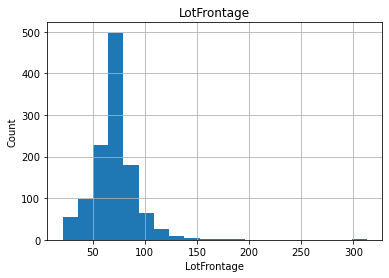

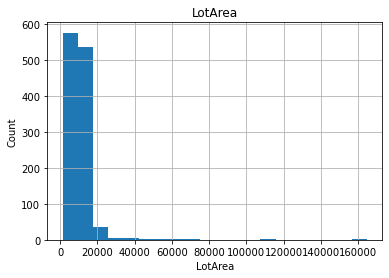

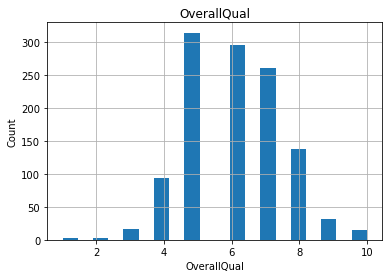

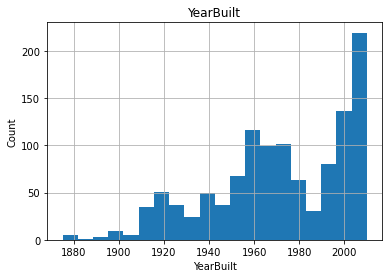

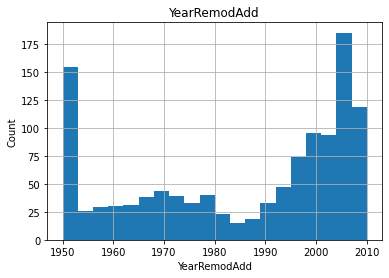

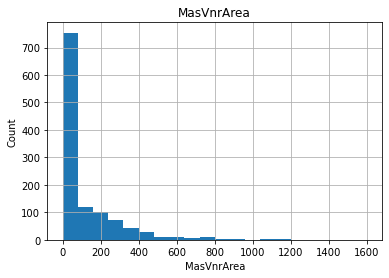

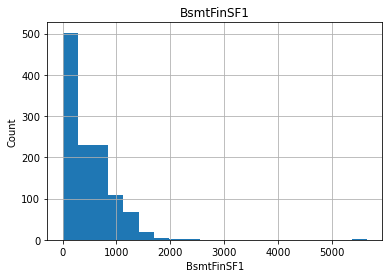

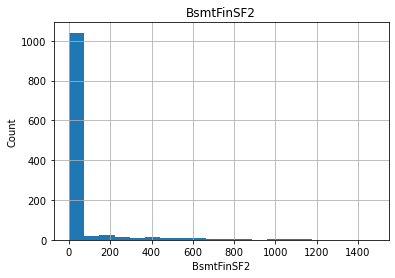

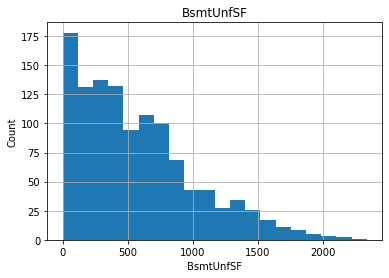

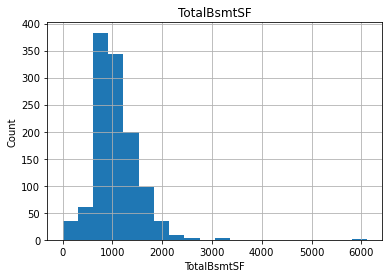

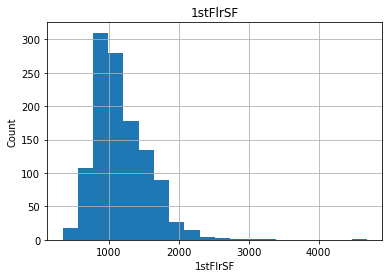

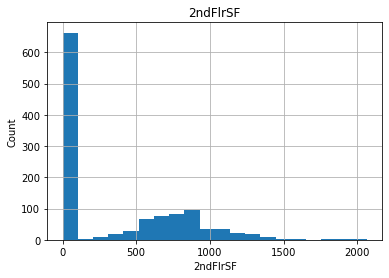

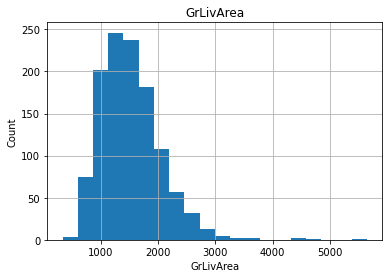

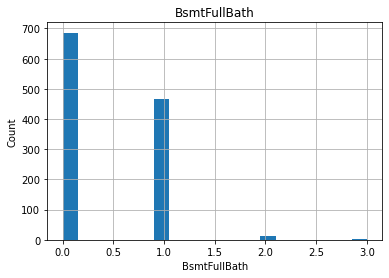

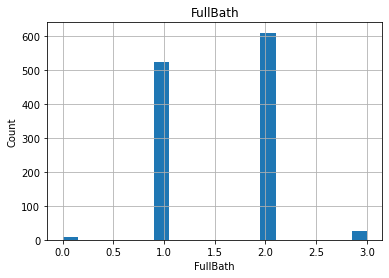

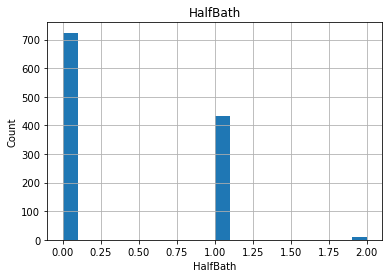

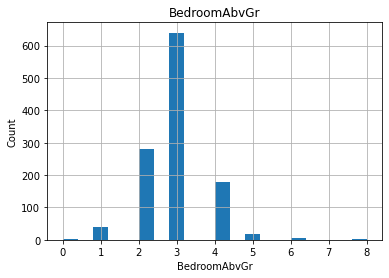

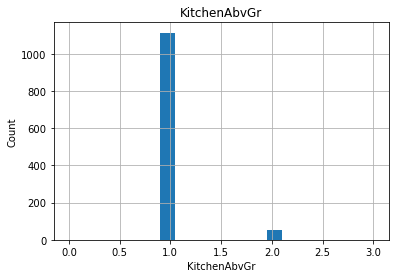

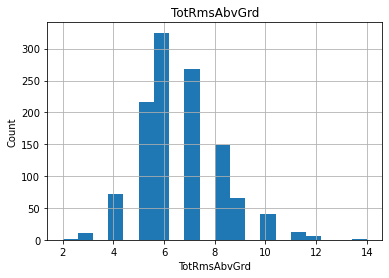

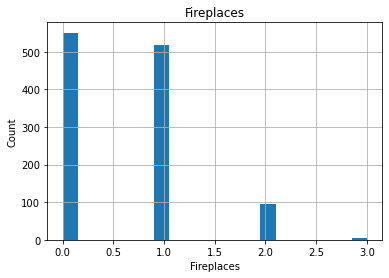

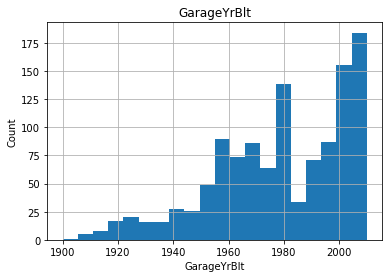

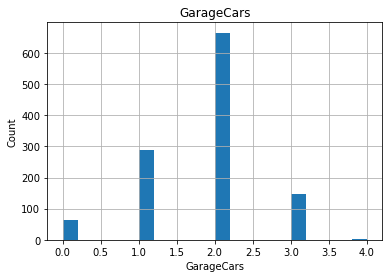

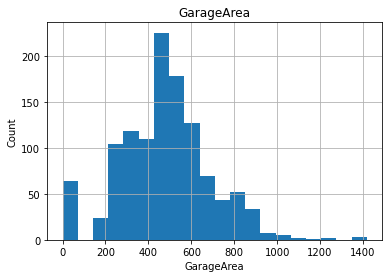

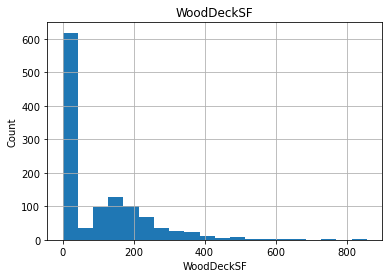

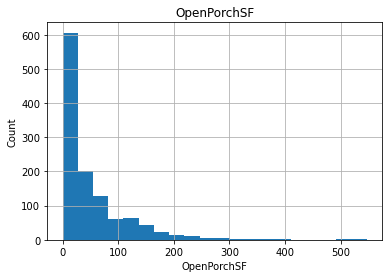

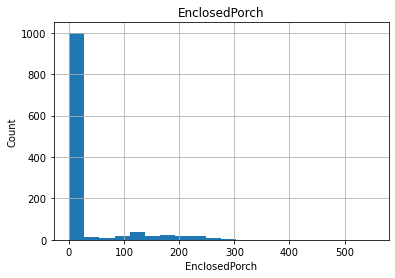

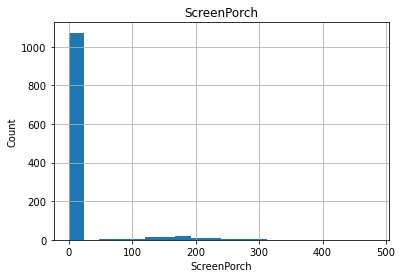

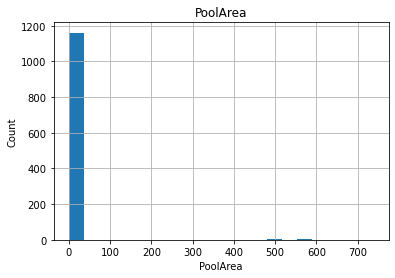

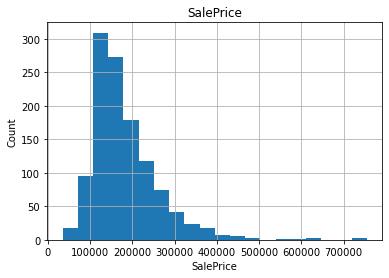

In [251]:
#visualizing each continuous feature
for feature in cont:
    data=df.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

1. lotFrontage:Almost all houses have LotFrontage between 20 to 150

2. lotArea:Around 580 house have lot Area between (0-10000)sqft.Very few houses have lot area aound 120000sqft & around 160000sqft

3. OverallQual: Rates the overall material and finish of the house-:Around 300 houses sold were in average condition.Only 10-15 houses were in excellent condition.

4. YearBuilt: Original construction date-:More number of people have brought the houses build after 1990

5. MasVnrArea: Masonry veneer area in square feet-:50% of houses have Masonry veneer area as '0-50' and out of rest 50% houses most houses have Masonry veneer area 50-1200

6. BsmtFinSF1: Type 1 finished square feet-:MOst houses have Type 1 finished square feet area of basement between 0 and 1500

7. BsmtFinSF2: Type 2 finished square feet-:Around 1000 houses have Type 2 finished square feet area of 0

8. BsmtUnfSF: Unfinished square feet of basement area-:Around 130 houses have unfinished basesent of area around 100-500 sqft

9. 1stFlrSF: First Floor square feet-:Around 280  houses have 1st floor square feet area between 800-1200sqft

10. GrLivArea: Above grade (ground) living area square feet-:Most houses have above ground living sq ft area in between 800 to 3000

11. BsmtFullBath: Basement full bathrooms-:50% houses have no full bathrooms in basement and in remaining houses most have 1 full bathrooms in basement and very few has 2 full bathrooms

12. FullBath: Full bathrooms above grade-:25% houses have 1 full bathrooms above ground and 50% have 2 full bathrooms located above ground and very less have 3

13. HalfBath: Half baths above grade-: around 700 houses have no half bathrooms  very few has 1 half bathroom

14. Bedroom: Bedrooms above grade (does NOT include basement bedrooms)-:Most houses have 3 bedrooms above ground followed by 2 and 4

15. Kitchen: Kitchens above grade-:Maximum houses have 1 Kitchen .very few have  2

16. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)-:Around 300 houses have 6 rooms ,around 200 have 5,&250 have 7.Very few have 12 & 14 rooms

17. Fireplaces: Number of fireplaces-:Most houses have 0 fireplaces followed by 1

18. GarageCars: Size of garage in car capacity-:Most houses have garage with 2 car capcity

19. GarageArea: Size of garage in square feet-:Most houses have Garage area in between 200 to 800

20. woodDeckSF: Wood deck area in square feet-:More than 50% of houses have 0 Wood Deck sq ft area and rest have in between 0 to 400

21. OpenPorchSF: Open porch area in square feet-:25% of houses have 0 open porch sq ft area and rest have in between 0 to 300


22. EnclosedPorch: Enclosed porch area in square feet-:Almost all houses have 0 enclosed porch sq ft area

23. ScreenPorch: Screen porch area in square feet-:Almost all houses have 0 screen porch area sq ft

24. PoolArea: Pool area in square feet-:Almost all houses have 0 sq ft of pool area





25. Sale Price-:Around 500 house  have sale price in between 100000 to 200000.Very few houses have sale price of 600000 & 700000

### Bivariate analysis

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

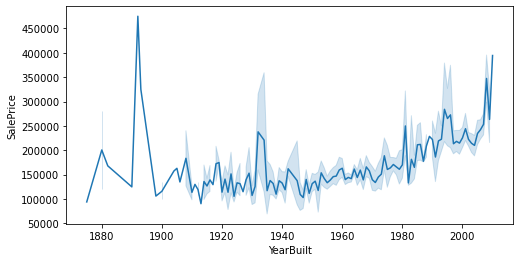

In [252]:
#lineplot between saleprice & year built
plt.figure(figsize=(8,4))
sns.lineplot(x='YearBuilt',y='SalePrice',data=df)

There seems to be a peak in House Prices that were build between 1885-1900, but then there is  drop in price till1980,after that price increases 

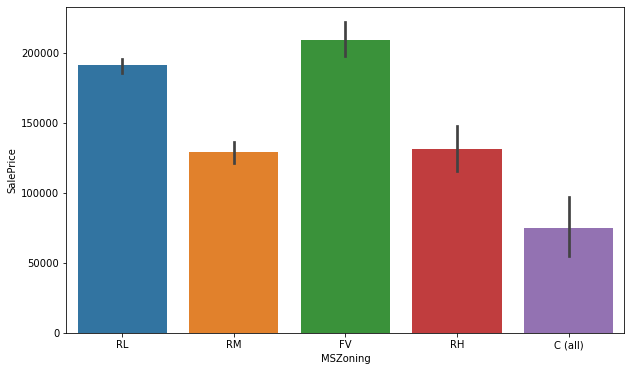

MSZoning
C (all)     75208.888889
FV         209478.461538
RH         131558.375000
RL         191004.181034
RM         129070.975460
Name: SalePrice, dtype: float64


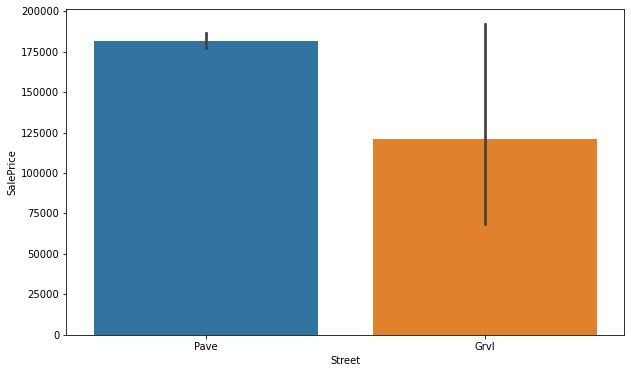

Street
Grvl    121110.750000
Pave    181684.450172
Name: SalePrice, dtype: float64


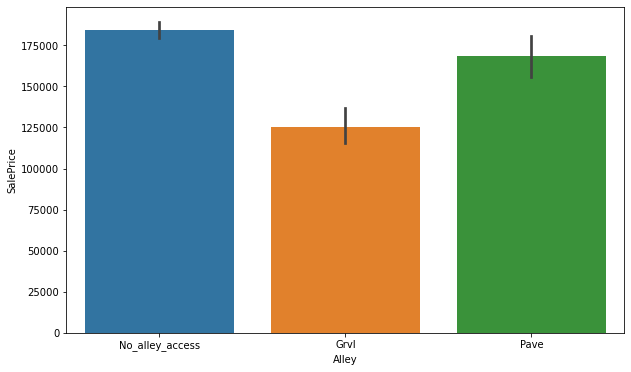

Alley
Grvl               125511.073171
No_alley_access    184016.191567
Pave               168264.555556
Name: SalePrice, dtype: float64


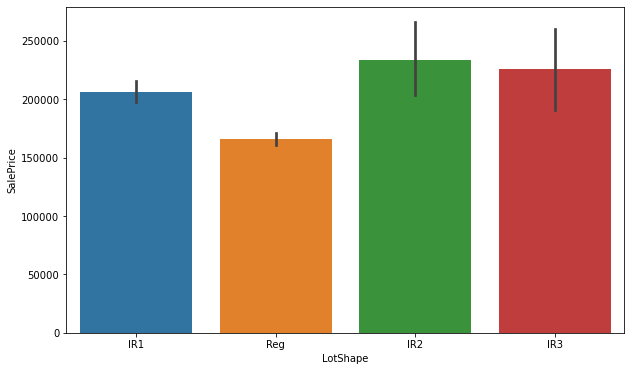

LotShape
IR1    206038.464103
IR2    233827.750000
IR3    226120.833333
Reg    165906.660811
Name: SalePrice, dtype: float64


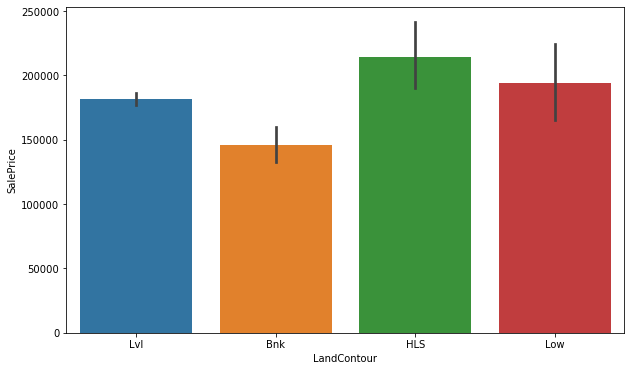

LandContour
Bnk    146163.140000
HLS    214302.166667
Low    194393.333333
Lvl    181476.572658
Name: SalePrice, dtype: float64


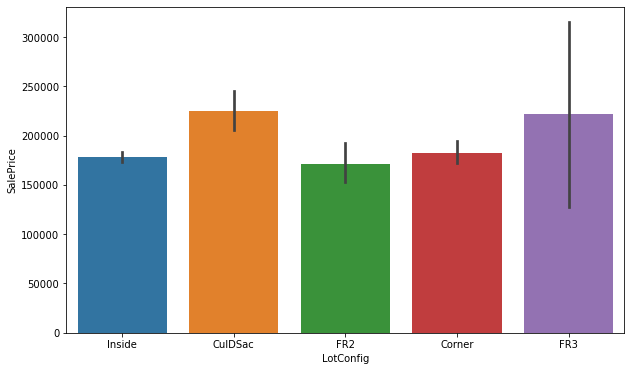

LotConfig
Corner     182427.635135
CulDSac    224594.463768
FR2        171138.636364
FR3        221500.000000
Inside     178003.105701
Name: SalePrice, dtype: float64


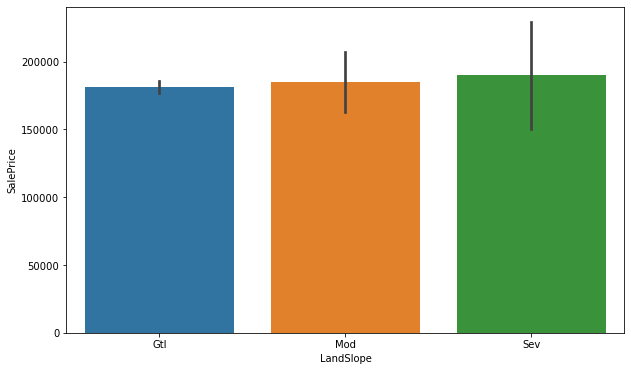

LandSlope
Gtl    181203.795475
Mod    185353.313725
Sev    190160.833333
Name: SalePrice, dtype: float64


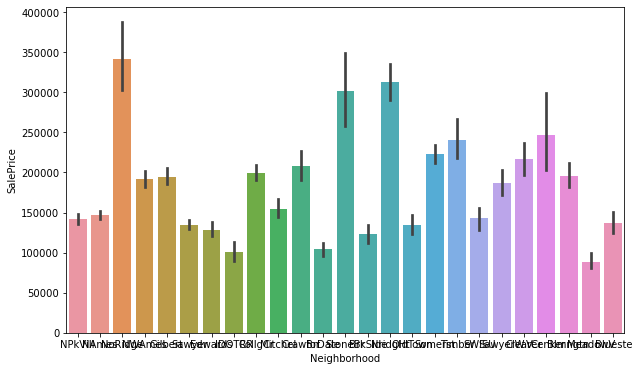

Neighborhood
Blmngtn    195987.000000
Blueste    137500.000000
BrDale     104081.818182
BrkSide    122836.000000
ClearCr    216120.833333
CollgCr    199517.508475
Crawfor    208474.688889
Edwards    128544.216867
Gilbert    194790.093750
IDOTRR     101322.666667
MeadowV     88444.444444
Mitchel    154654.411765
NAmes      146511.225275
NPkVill    141968.750000
NWAmes     191643.305085
NoRidge    341260.228571
NridgHt    312548.655738
OldTown    133947.197674
SWISU      142587.333333
Sawyer     135029.866667
SawyerW    186909.647059
Somerst    222649.588235
StoneBr    301145.736842
Timber     240579.291667
Veenker    246833.333333
Name: SalePrice, dtype: float64


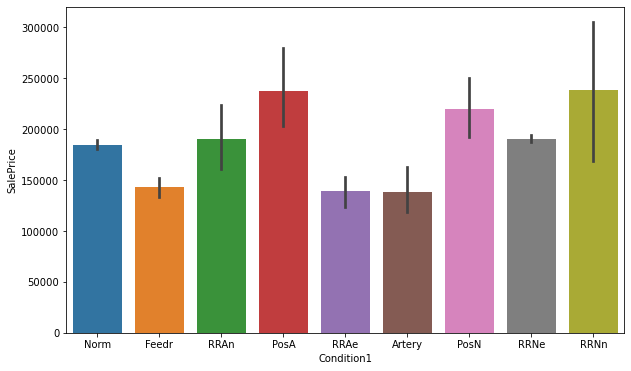

Condition1
Artery    137926.315789
Feedr     142799.731343
Norm      184692.003980
PosA      237833.333333
PosN      219264.705882
RRAe      139044.444444
RRAn      190074.850000
RRNe      190750.000000
RRNn      238000.000000
Name: SalePrice, dtype: float64


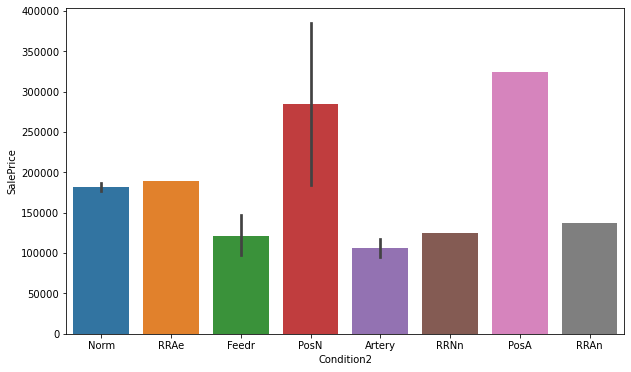

Condition2
Artery    106500.000000
Feedr     121166.666667
Norm      181697.129983
PosA      325000.000000
PosN      284875.000000
RRAe      190000.000000
RRAn      136905.000000
RRNn      125000.000000
Name: SalePrice, dtype: float64


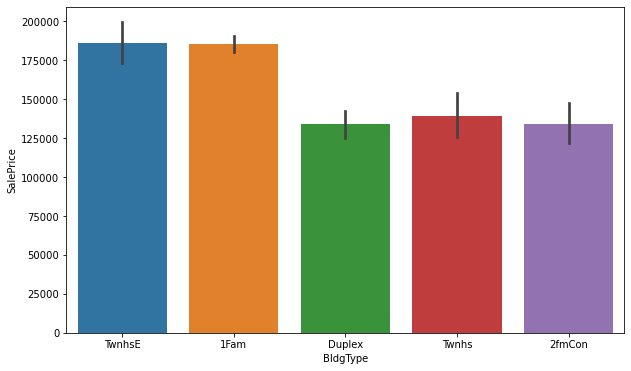

BldgType
1Fam      185602.300714
2fmCon    133737.037037
Duplex    133871.609756
Twnhs     139437.931034
TwnhsE    186066.111111
Name: SalePrice, dtype: float64


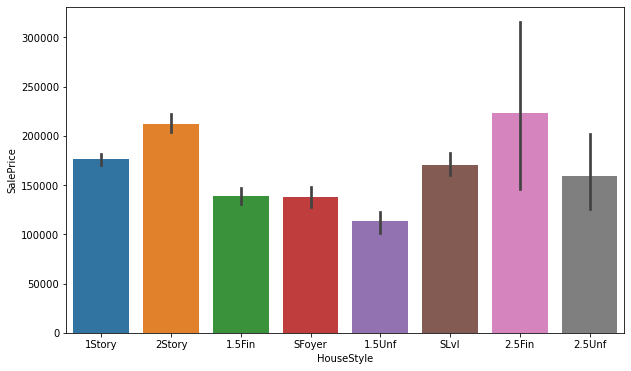

HouseStyle
1.5Fin    138546.363636
1.5Unf    113216.666667
1Story    175940.826990
2.5Fin    223285.714286
2.5Unf    158690.000000
2Story    212193.515235
SFoyer    137508.000000
SLvl      170140.851064
Name: SalePrice, dtype: float64


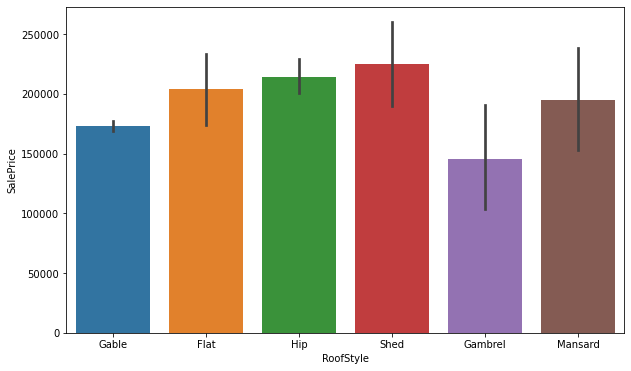

RoofStyle
Flat       204080.833333
Gable      173251.570492
Gambrel    145111.111111
Hip        214493.364444
Mansard    194795.800000
Shed       225000.000000
Name: SalePrice, dtype: float64


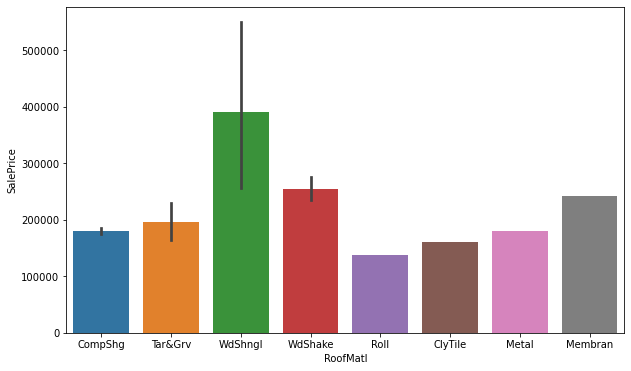

RoofMatl
ClyTile    160000.000000
CompShg    180009.329545
Membran    241500.000000
Metal      180000.000000
Roll       137000.000000
Tar&Grv    195747.000000
WdShake    254250.000000
WdShngl    390250.000000
Name: SalePrice, dtype: float64


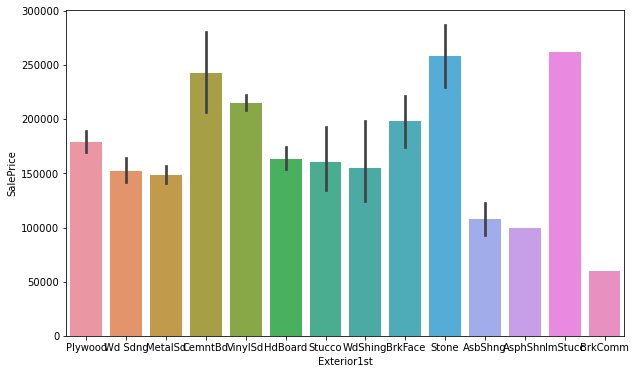

Exterior1st
AsbShng    107774.263158
AsphShn    100000.000000
BrkComm     60000.000000
BrkFace    198391.463415
CemntBd    242928.476190
HdBoard    163432.648045
ImStucc    262000.000000
MetalSd    148498.196629
Plywood    178890.075269
Stone      258500.000000
Stucco     160602.272727
VinylSd    215359.676768
Wd Sdng    152572.724138
WdShing    155481.578947
Name: SalePrice, dtype: float64


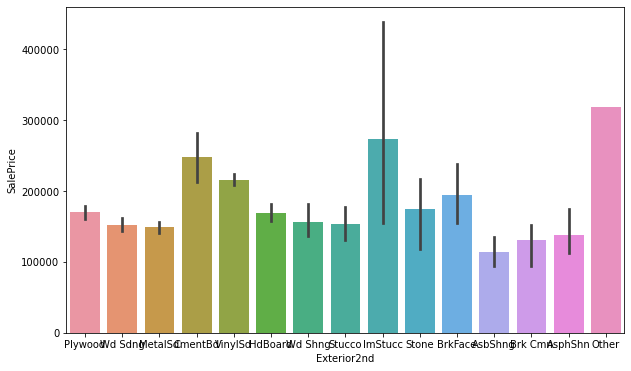

Exterior2nd
AsbShng    114372.833333
AsphShn    138000.000000
Brk Cmn    131300.000000
BrkFace    194772.500000
CmentBd    247940.380952
HdBoard    168398.200000
ImStucc    273712.500000
MetalSd    148570.398844
Other      319000.000000
Plywood    169979.042373
Stone      174406.000000
Stucco     153066.695652
VinylSd    215607.100775
Wd Sdng    152218.969697
Wd Shng    156650.000000
Name: SalePrice, dtype: float64


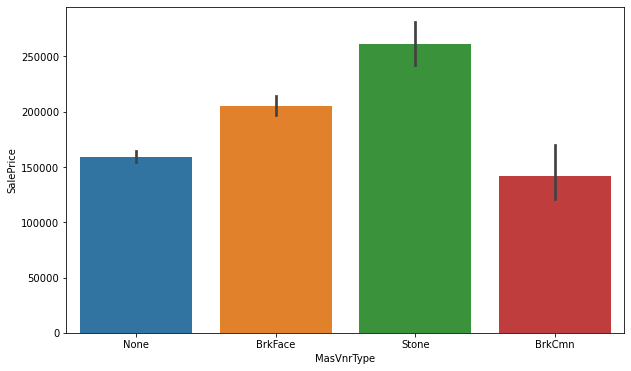

MasVnrType
BrkCmn     141990.076923
BrkFace    205275.432203
None       159079.399716
Stone      261417.867347
Name: SalePrice, dtype: float64


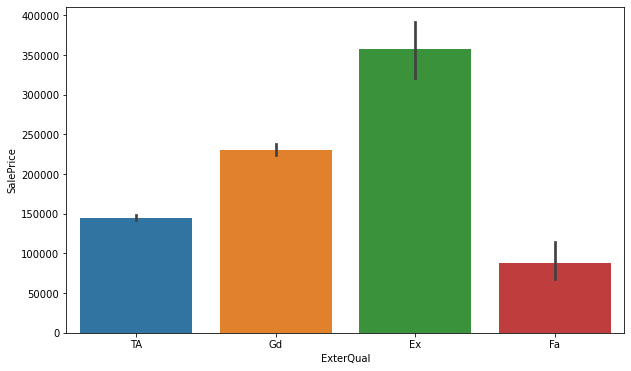

ExterQual
Ex    357817.651163
Fa     87435.727273
Gd    231009.743073
TA    144918.163180
Name: SalePrice, dtype: float64


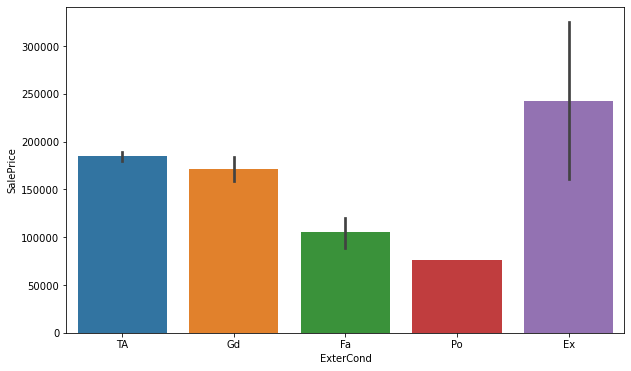

ExterCond
Ex    243000.000000
Fa    105294.769231
Gd    171391.837607
Po     76500.000000
TA    184551.990215
Name: SalePrice, dtype: float64


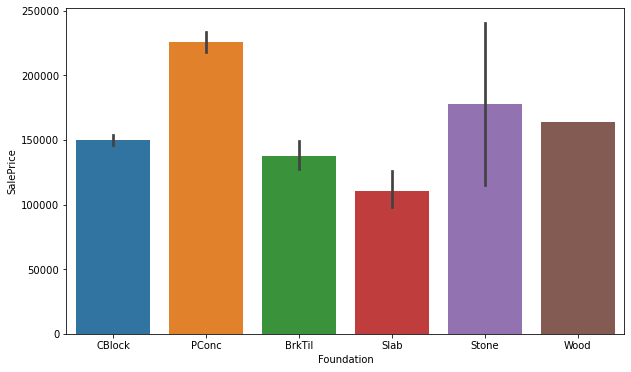

Foundation
BrkTil    137895.285714
CBlock    149858.994186
PConc     225757.504873
Slab      110846.428571
Stone     177651.000000
Wood      164000.000000
Name: SalePrice, dtype: float64


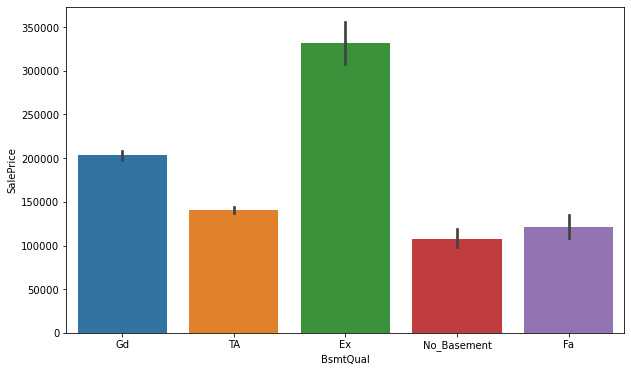

BsmtQual
Ex             331469.978723
Fa             121349.000000
Gd             203225.445783
No_Basement    107897.500000
TA             140898.736944
Name: SalePrice, dtype: float64


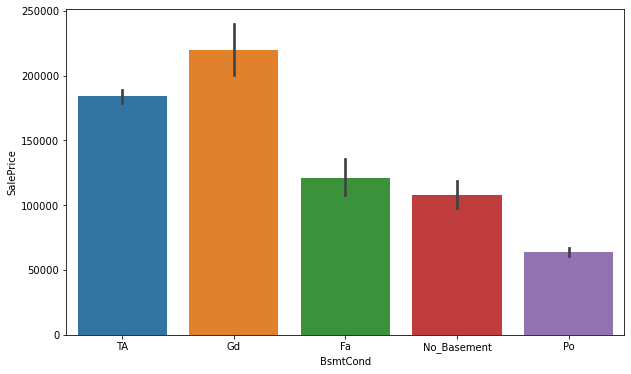

BsmtCond
Fa             121075.102564
Gd             219908.107143
No_Basement    107897.500000
Po              64000.000000
TA             184018.669549
Name: SalePrice, dtype: float64


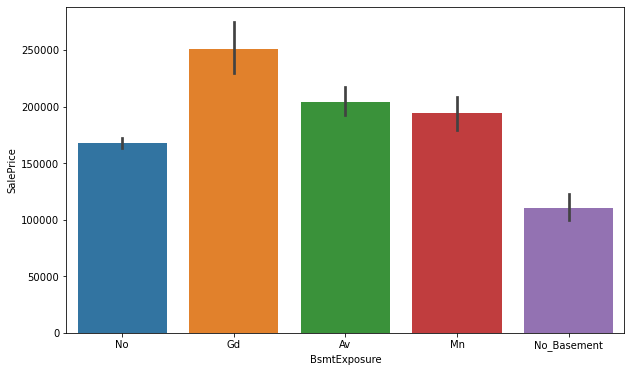

BsmtExposure
Av             204174.861111
Gd             250581.138889
Mn             194213.838710
No             167539.144180
No_Basement    110626.612903
Name: SalePrice, dtype: float64


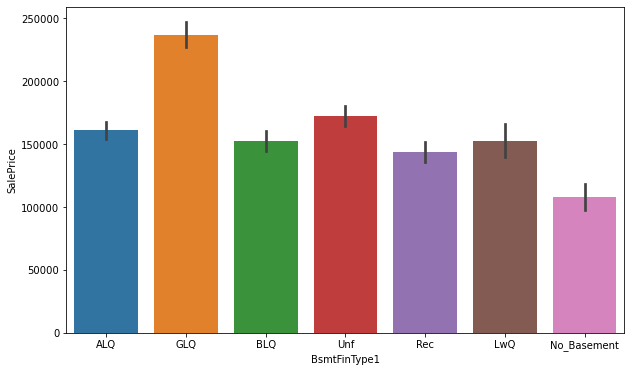

BsmtFinType1
ALQ            161003.879310
BLQ            152803.396694
GLQ            236871.596970
LwQ            152712.711864
No_Basement    107897.500000
Rec            143592.844037
Unf            172159.521739
Name: SalePrice, dtype: float64


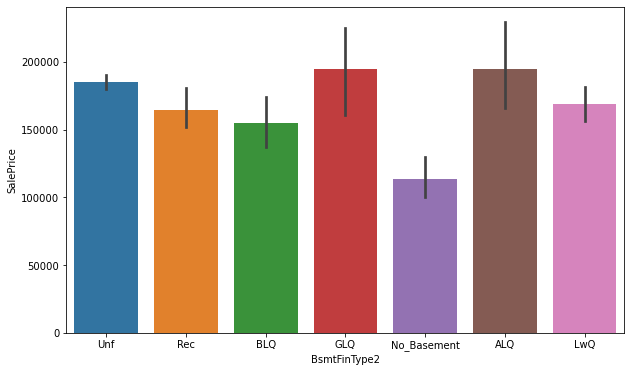

BsmtFinType2
ALQ            194712.500000
BLQ            154815.958333
GLQ            194937.500000
LwQ            168846.250000
No_Basement    113578.225806
Rec            164477.325581
Unf            185077.455090
Name: SalePrice, dtype: float64


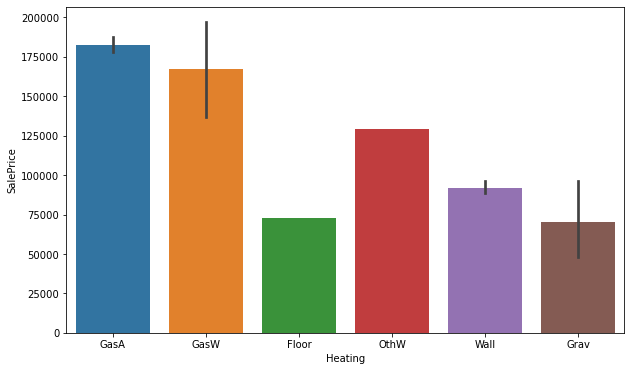

Heating
Floor     72500.000000
GasA     182591.394576
GasW     167312.785714
Grav      70080.000000
OthW     129500.000000
Wall      92100.000000
Name: SalePrice, dtype: float64


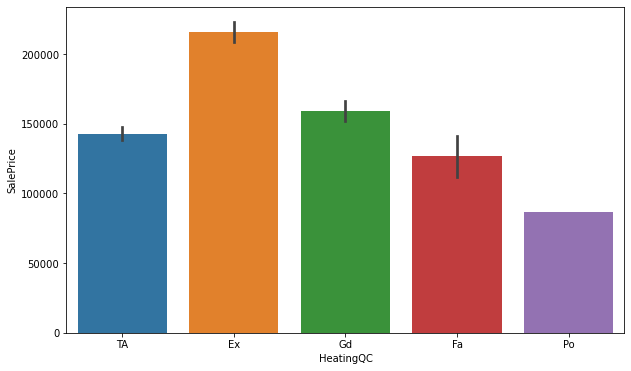

HeatingQC
Ex    215954.223932
Fa    126556.710526
Gd    158909.833333
Po     87000.000000
TA    142684.883523
Name: SalePrice, dtype: float64


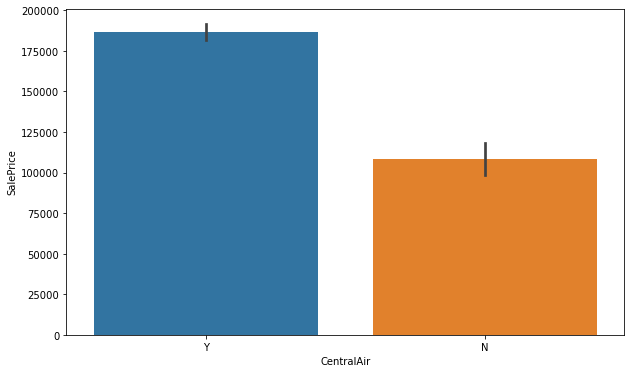

CentralAir
N    108539.576923
Y    186696.381651
Name: SalePrice, dtype: float64


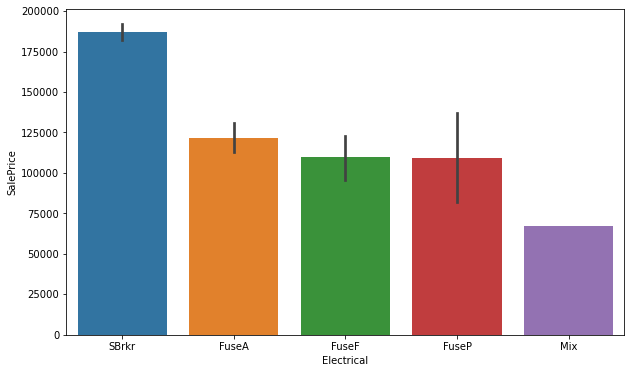

Electrical
FuseA    121840.986486
FuseF    109611.285714
FuseP    109500.000000
Mix       67000.000000
SBrkr    187253.339252
Name: SalePrice, dtype: float64


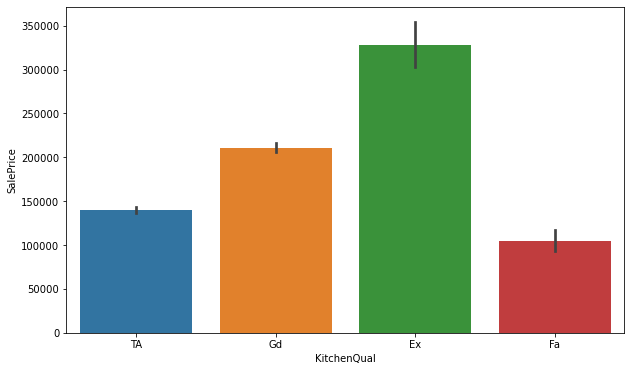

KitchenQual
Ex    327812.329268
Fa    105028.100000
Gd    211076.234310
TA    140206.313149
Name: SalePrice, dtype: float64


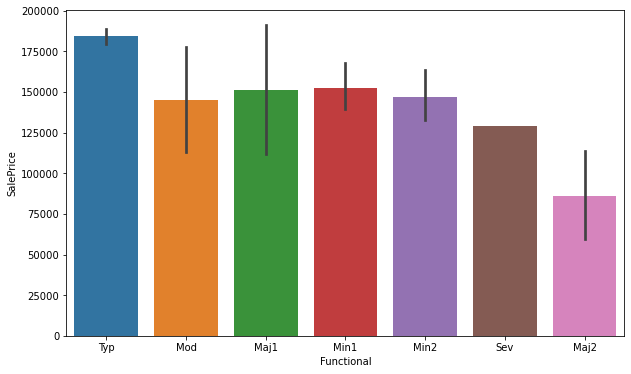

Functional
Maj1    151443.090909
Maj2     86000.000000
Min1    152630.000000
Min2    146841.666667
Mod     145241.666667
Sev     129000.000000
Typ     184204.948387
Name: SalePrice, dtype: float64


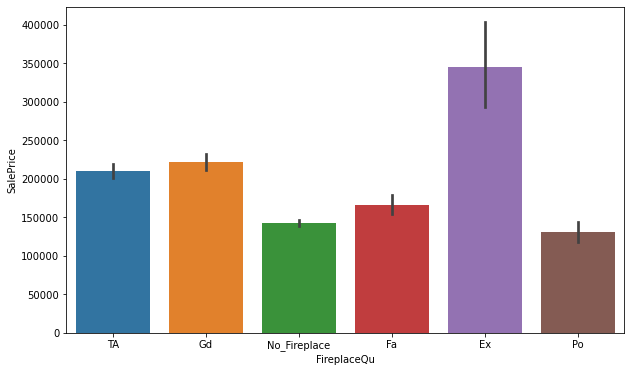

FireplaceQu
Ex              346091.142857
Fa              166214.000000
Gd              221925.581395
No_Fireplace    142411.822142
Po              131487.944444
TA              209946.753968
Name: SalePrice, dtype: float64


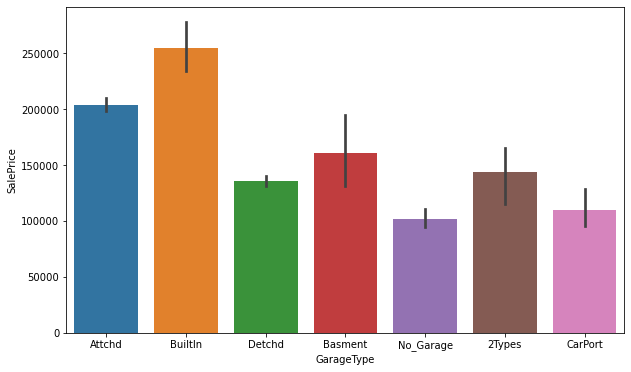

GarageType
2Types       144200.000000
Attchd       203675.839363
Basment      160708.937500
BuiltIn      254970.900000
CarPort      109957.375000
Detchd       135873.799363
No_Garage    102200.000000
Name: SalePrice, dtype: float64


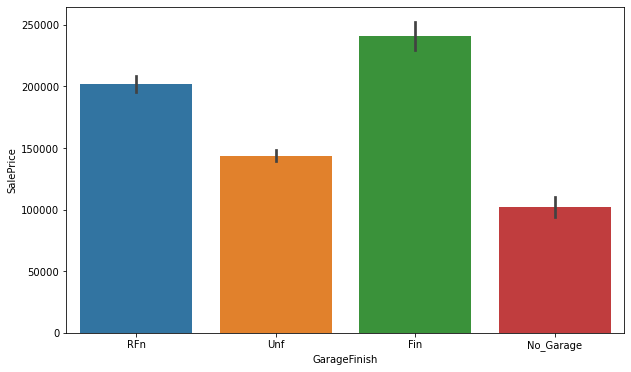

GarageFinish
Fin          241223.809353
No_Garage    102200.000000
RFn          201925.554572
Unf          143555.156057
Name: SalePrice, dtype: float64


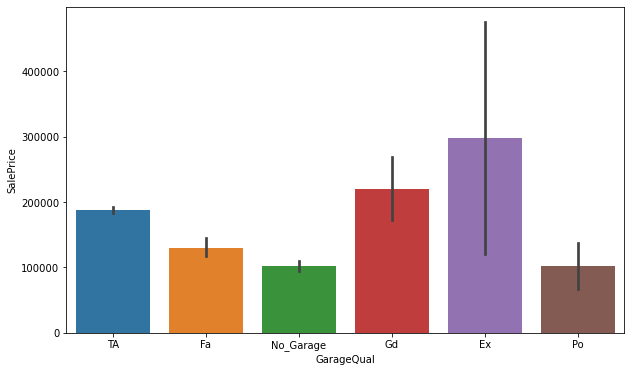

GarageQual
Ex           297750.000000
Fa           129889.000000
Gd           219822.727273
No_Garage    102200.000000
Po           102000.000000
TA           187753.449524
Name: SalePrice, dtype: float64


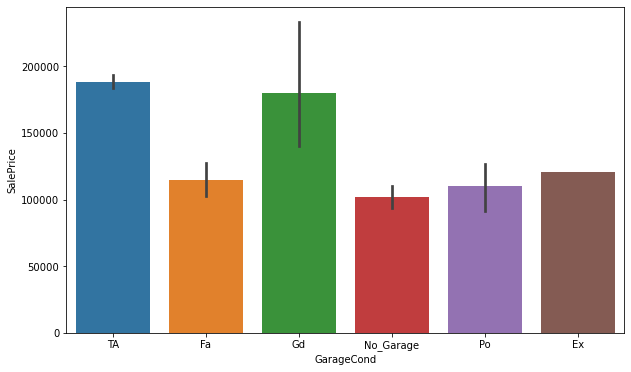

GarageCond
Ex           120500.000000
Fa           115031.821429
Gd           179921.250000
No_Garage    102200.000000
Po           110500.000000
TA           188483.112158
Name: SalePrice, dtype: float64


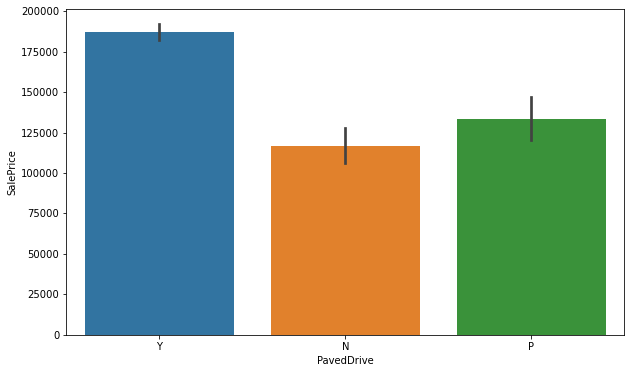

PavedDrive
N    116421.472973
P    133326.086957
Y    187006.026144
Name: SalePrice, dtype: float64


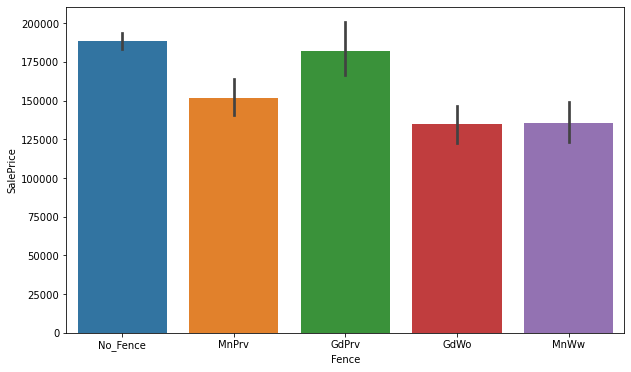

Fence
GdPrv       181743.529412
GdWo        134593.255319
MnPrv       151392.798450
MnWw        135715.000000
No_Fence    188489.279270
Name: SalePrice, dtype: float64


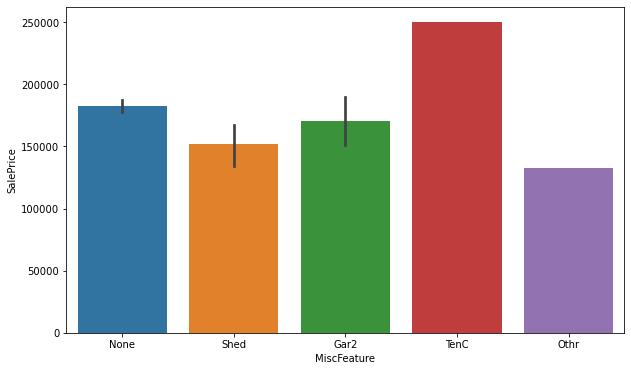

MiscFeature
Gar2    170750.000000
None    182541.548043
Othr    133000.000000
Shed    151598.575000
TenC    250000.000000
Name: SalePrice, dtype: float64


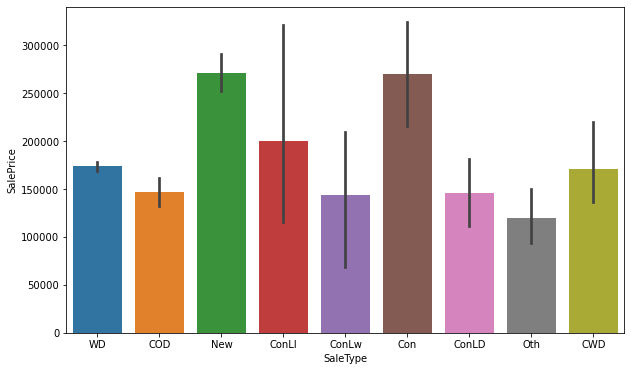

SaleType
COD      146722.368421
CWD      171166.666667
Con      269600.000000
ConLD    146141.000000
ConLI    200390.000000
ConLw    143625.000000
New      271104.500000
Oth      119850.000000
WD       173668.456456
Name: SalePrice, dtype: float64


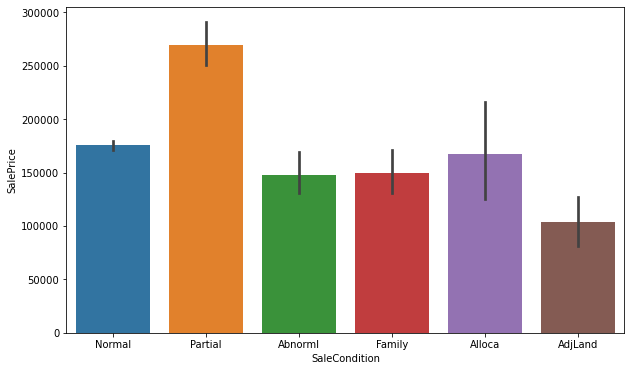

SaleCondition
Abnorml    147567.938272
AdjLand    104125.000000
Alloca     167377.416667
Family     149138.888889
Normal     175436.408466
Partial    269585.231481
Name: SalePrice, dtype: float64


In [253]:
#visualizing each categorical column wrt sale price
for i in categorical:
    plt.figure(figsize=(10,6))
    sns.barplot(x=df[i],y=df['SalePrice'])
    plt.show()
    print(df.groupby(df[i])['SalePrice'].mean())

### Observation

1. MSZoning:The avg sale price of the house is maximum in FV(Floating Village Residential) foloowed by  RL(Residential Low Density) zone

2. Street:The property  that have access to paved road have much higher average sale price  as compared to that with gravel street 

3. Alley:houses that do not have access to alley have higher sale price as compared to those with paved or gravel alley

4. LotShape:sale price is not much affected by lotshape,however IR2(Moderately Irregular) have a bit higher price compared to other while Reg(Regular) have lowest avg sale price
  

5. LandContour:Flatness of the property-:HLS(Hillside - Significant slope from side to side)  have maximum average sale price & Bnk(Banked - Quick and significant rise from street grade to building) have miimum average sale price

6. LandSlope: It doesn't affect the average sale price of house

7. Neighborhood:The houses that has a neighbourhood of NoRidge(Northridge) has the maximum sale price followed by that with a neighbourhood of NridgHt(Northridge Heights)

8. Condition1:house that is RRAn(Adjacent to North-South Railroad) has hightest avg sale price followed by PosA(Adjacent to postive off-site feature) while houses that is Artery(Adjacent to arterial street) has a minimum average sale price.

9. BldgType: Type of dwelling-:TwnhsE(Townhouse End Unit) & 1Fam(Single-family Detached) type house have hightset selling price .

10. HouseStyle: Style of dwelling-:The average sale price of 2.5Fin(Two and one-half story) is maximum followed by 2Story(Two story). 1.5Unf(One and one-half story: 2nd level unfinished) have lowest avg selling price

11. RoofMatl: Roof material-:House with roof material WdShngl(Wood Shingles) have a very high average selling price,followed by that with roof of WdShake(Wood Shakes),while house with roof material Roll(Roll) have lowest sale price

12. Exterior1st: Exterior covering on house-:House with exterior covering of ImStucc(Imitation Stucco) have maximum selling price while that with exterior coverng of BrkComm(Brick Common) have minimum average selling price

13. ExterQual: Evaluates the quality of the material on the exterior-:Houses with exterior material of excellent quality have highest saelling price followed by that of gd(good) quality

14. KitchenQual: Kitchen quality-:Houses with Ex(Excellent) kitchen quality have higher sale price while that with Fa(Fair) kitchen quality of lower selling price

#### visualising sale price wrt to each continuos feature

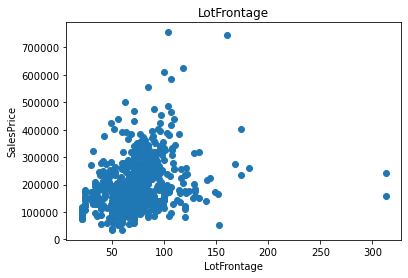

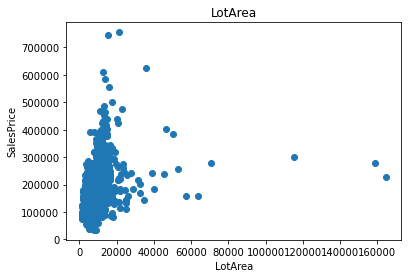

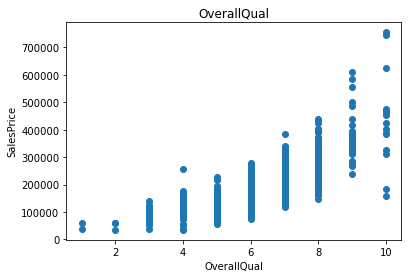

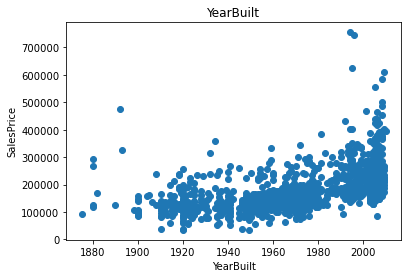

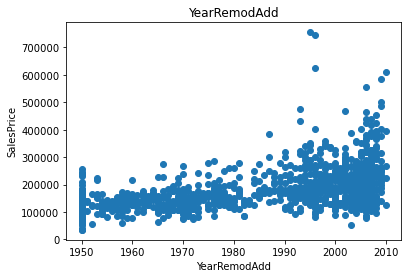

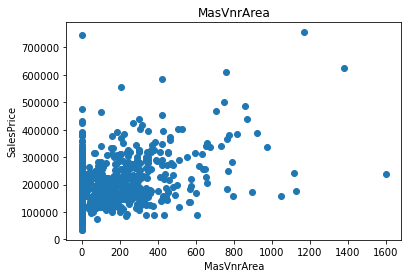

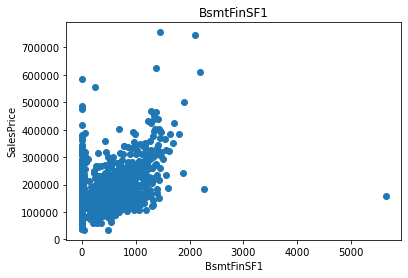

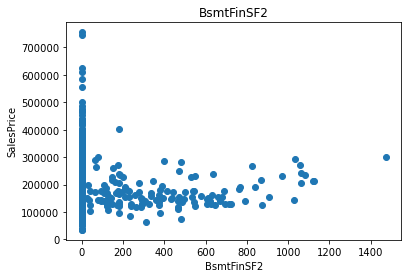

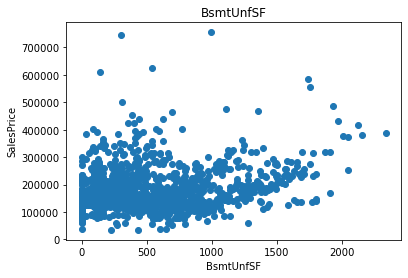

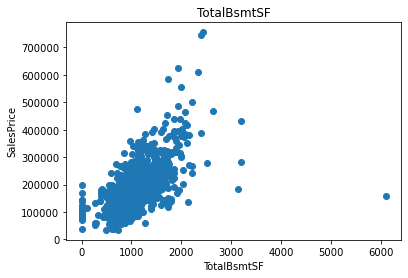

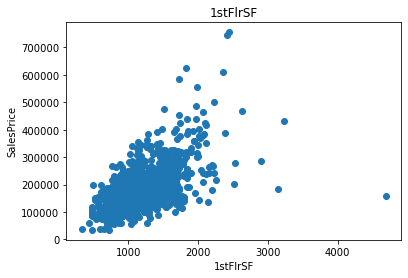

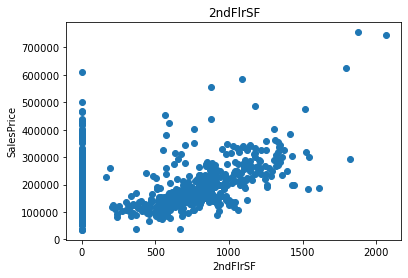

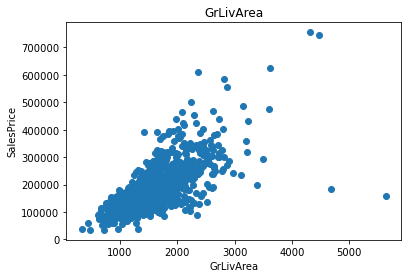

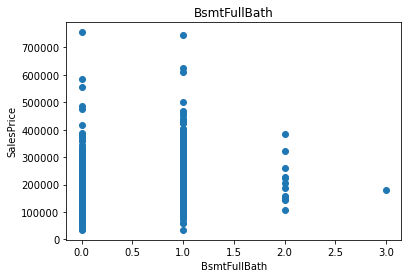

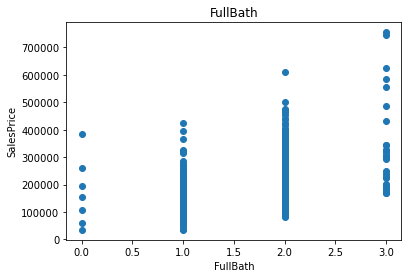

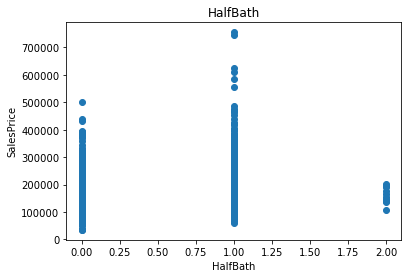

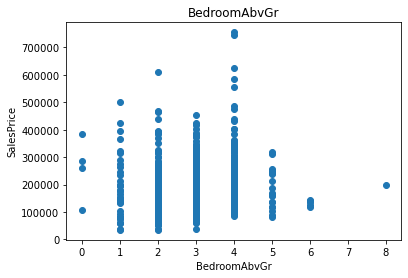

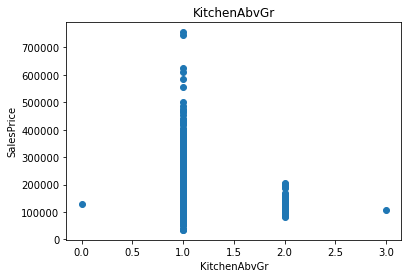

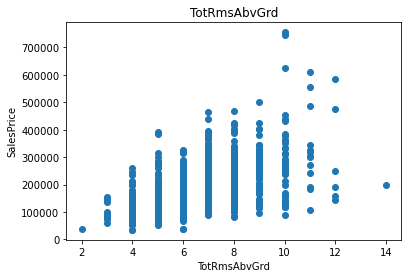

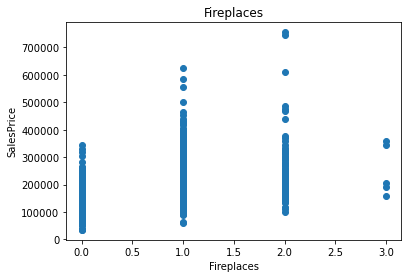

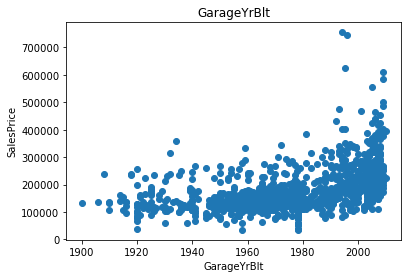

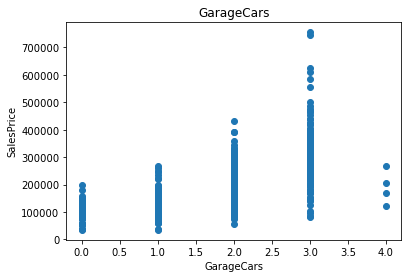

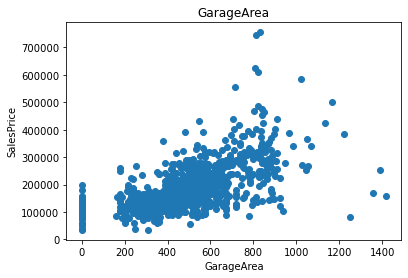

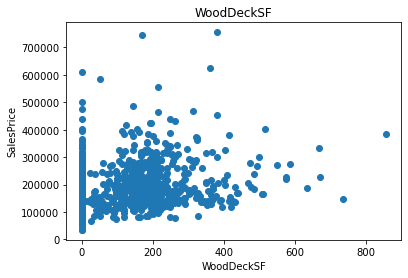

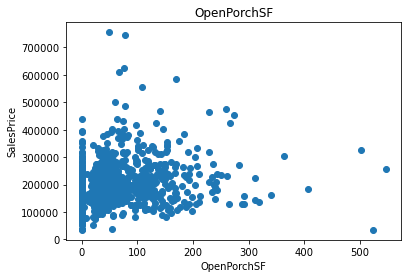

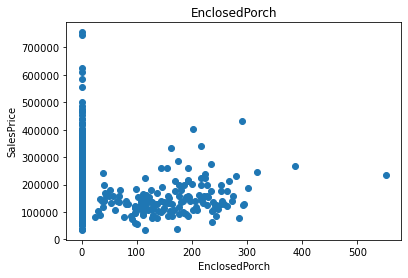

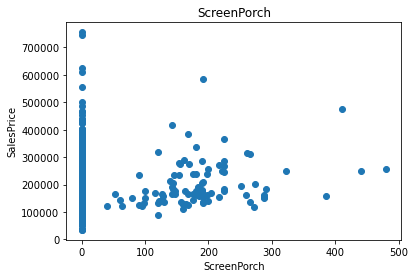

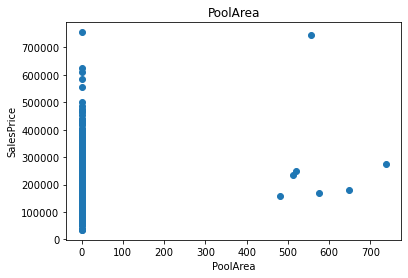

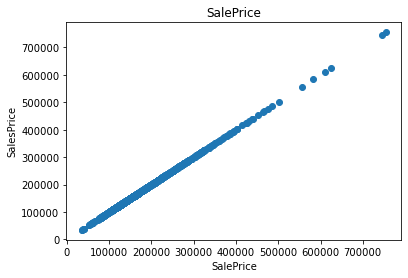

In [254]:
# visualising sale price wrt to each continuos feature
for i in cont:
    plt.scatter(df[i],df['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalesPrice')
    plt.title(i)
    plt.show()
   

1. LotFrontage: Linear feet of street connected to property-: Lot frontage doed not impact much on sale price since houses with different sale price are having same Lot frontage area

2. LotArea: Lot size in square feet-: LotArea doesn't affect sale price of the houses much, as can be seen different sale price are availble within the Lot area range of 0 to 20000.In fact some houses where Lot Area is very large have moderate sale price

3. OverallQual: Rates the overall material and finish of the house-:Overall quality is directly proportional to the sale price of houses

4. YearBuilt: & YearRemodAdd: Houses which are build latest have high sale price in comparison to those build in early years.similar is the case with remodelling date

5. BsmtFinSF1: Type 1 finished square feet-:Total sq ft of basement area is directly proportional to sale price

6. Houses with higher number of full bathrooms seems having high sale price

7. Kitchen: Kitchens above grade-:houses with 1 kitchen above ground have high sale price in comparison to those having 2 kitchens


8. Fireplaces: Number of fireplaces-:Houses with 1 and 2 fireplaces have higher prices in comparion to houses having 0 or 3 fireplaces


9. Wood deck,Enclosed porch,Three season porch, screen porch,pool area,Miscval do not have impact on sale price


In [255]:
#transform non numeric column into numeric one
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype==np.number:
        continue
    df[col]=le.fit_transform(df[col])

### checking skewness

In [256]:
df.skew()

MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
Alley            -0.203241
                   ...    
Fence            -1.955758
MiscFeature       4.958391
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 70, dtype: float64

we observe that skewness is present is dataset,which needs to be removed

In [257]:
#treating skewness via squareroot method and cube root method
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

### Checking outliers

MSZoning            AxesSubplot(0.125,0.826831;0.0824468x0.053169)
LotFrontage      AxesSubplot(0.223936,0.826831;0.0824468x0.053169)
LotArea          AxesSubplot(0.322872,0.826831;0.0824468x0.053169)
Street           AxesSubplot(0.421809,0.826831;0.0824468x0.053169)
Alley            AxesSubplot(0.520745,0.826831;0.0824468x0.053169)
                                       ...                        
Fence            AxesSubplot(0.223936,0.316408;0.0824468x0.053169)
MiscFeature      AxesSubplot(0.322872,0.316408;0.0824468x0.053169)
SaleType         AxesSubplot(0.421809,0.316408;0.0824468x0.053169)
SaleCondition    AxesSubplot(0.520745,0.316408;0.0824468x0.053169)
SalePrice        AxesSubplot(0.619681,0.316408;0.0824468x0.053169)
Length: 70, dtype: object

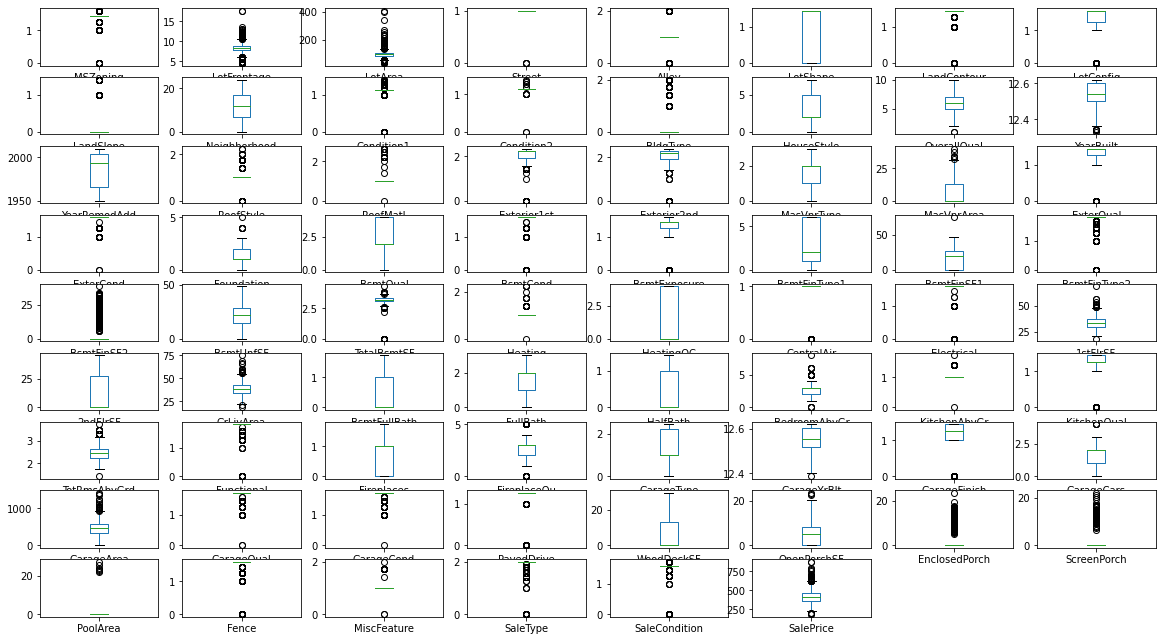

In [258]:
df.plot(kind='box',subplots=True,layout=(12,8),figsize=(20,15))

In [259]:
#removing outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

df_new=df.loc[(z_score<6).all(axis=1)]
print(df_new.shape)

(1168, 70)
(1084, 70)


When we apply z-score of 3 , 57% of the data is lost (due to the wide spread of most of the data). We compromised by enlarging the z-score cut-off to 6 resulting in a loss of few data.

# Feature Selection

In [260]:
#spliting the data into input and output variable
x=df_new.drop('SalePrice',axis=1)
x.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,Fence,MiscFeature,SaleType,SaleCondition
0,1.44225,8.425466,70.199715,1.0,1,0.0,1.44225,1.587401,0.0,13,...,1.259921,0.000000,14.317821,0.0,0.0,0.0,1.587401,1.0,2.000000,1.587401
2,1.44225,9.591663,99.599197,1.0,1,0.0,1.44225,1.000000,0.0,15,...,1.259921,13.416408,11.401754,0.0,0.0,0.0,1.587401,1.0,2.000000,1.587401
3,1.44225,10.246951,108.402030,1.0,1,0.0,1.44225,1.587401,0.0,14,...,1.259921,0.000000,11.045361,0.0,0.0,0.0,1.259921,1.0,0.000000,1.587401
4,1.44225,8.425466,128.976742,1.0,1,0.0,1.44225,1.259921,0.0,14,...,1.259921,15.491933,0.000000,0.0,0.0,0.0,1.587401,1.0,2.000000,1.587401
5,1.44225,7.615773,118.549568,1.0,1,0.0,1.44225,1.587401,0.0,8,...,1.259921,10.000000,4.123106,0.0,0.0,0.0,1.587401,1.0,1.817121,1.709976


In [261]:
y=df_new['SalePrice']
y.head()

0    357.770876
2    519.413130
3    435.889894
4    463.680925
5    468.198676
Name: SalePrice, dtype: float64

In [262]:
# checking the shape of input & target variable
print(x.shape)
print(y.shape)

(1084, 69)
(1084,)


In [263]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(df_new)
x=pd.DataFrame(x,columns=df_new.columns)
x.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,0.033566,0.106441,-1.234330,0.0,0.021482,-1.410876,0.264179,0.546909,-0.206451,0.129246,...,-0.920683,1.981368,-0.391045,-0.2886,0.0,0.368025,-0.187495,0.255365,0.243456,-0.739769
1,0.033566,1.087010,0.132362,0.0,0.021482,-1.410876,0.264179,-0.414460,-0.206451,0.460849,...,0.947972,1.381649,-0.391045,-0.2886,0.0,0.368025,-0.187495,0.255365,0.243456,1.251579
2,0.033566,1.637992,0.541579,0.0,0.021482,-1.410876,0.264179,0.546909,-0.206451,0.295047,...,-0.920683,1.308353,-0.391045,-0.2886,0.0,-0.619532,-0.187495,-5.229753,0.243456,0.222617
3,0.033566,0.106441,1.498035,0.0,0.021482,-1.410876,0.264179,0.010940,-0.206451,0.295047,...,1.237054,-0.963241,-0.391045,-0.2886,0.0,0.368025,-0.187495,0.255365,0.243456,0.564988
4,0.033566,-0.574369,1.013308,0.0,0.021482,-1.410876,0.264179,0.546909,-0.206451,-0.699762,...,0.472130,-0.115282,-0.391045,-0.2886,0.0,0.368025,-0.187495,-0.246193,0.554917,0.620644


In [264]:
# PCA is required for the analysis to reduce curse of Dimensionality & at the same time minimizing information loss 
from sklearn.decomposition import PCA
for i in range(20,50):
    pca = PCA(n_components=i)
    x_pca=pca.fit_transform(x)
    print(i," variance :{}".format(np.sum(pca.explained_variance_ratio_)))

20  variance :0.6489277381747375
21  variance :0.6638783262277954
22  variance :0.6787589286864327
23  variance :0.6926347230066313
24  variance :0.7061851784780687
25  variance :0.720131163542662
26  variance :0.7318074499430953
27  variance :0.7450205485957493
28  variance :0.7575093679312208
29  variance :0.7689591133036356
30  variance :0.781029566368727
31  variance :0.7920058256244643
32  variance :0.8026023023942268
33  variance :0.8128543612386829
34  variance :0.8232276006304003
35  variance :0.8331214064662541
36  variance :0.8430936323453194
37  variance :0.8525848259401163
38  variance :0.8615318659900659
39  variance :0.870477403754708
40  variance :0.8791354192649647
41  variance :0.8877113410446923
42  variance :0.8957013176843235
43  variance :0.9033256171149697
44  variance :0.9104450351678514
45  variance :0.9170641978712789
46  variance :0.9233961565217512
47  variance :0.9296703274134654
48  variance :0.9357184642047713
49  variance :0.9413771885903498


In [265]:
x.shape

(1084, 70)

In [266]:
# Selecting 49 features, as it explains 94% of data

In [267]:
#lets use n=49
pca = PCA(n_components=49)
x=pca.fit_transform(x)

In [268]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=42)

In [269]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (867, 49)
x_test_shape: (217, 49)
y_train_shape: (867,)
y_test_shape: (217,)


In [270]:
#pip install xgboost

In [271]:
#Importing all the model library

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing boosting model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

#import error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [272]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    lg_pred=lg.predict(x_test)
    r2_scr=r2_score(y_test,lg_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print('max r2 score corresponding to ',final_r_state,'is',max_r_score)

max r2 score corresponding to  66 is 0.9509066950646884


In [273]:
#using GridsearchCV to find the best parmeter in  KNeighborsRegressor
parameters={'n_neighbors':range(20,30),'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute')}
knn=KNeighborsRegressor()
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 20}


In [274]:
#using GridsearchCV to find the best parmeter in  DecisionTreeRegressor

parameters={'criterion':('mse', 'friedman_mse', 'mae'),'splitter' : ("best", "random"),'random_state':range(42,100)}
dtc=DecisionTreeRegressor()
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)

print(clf.best_params_)

{'criterion': 'mae', 'random_state': 66, 'splitter': 'best'}


In [275]:
#gridsearchcv for SVR
parameters={'kernel':('linear', 'poly', 'rbf', 'sigmoid'),'C':[1,10]}
svr=SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x,y)


print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [276]:
#gridsearchcv for GradientBoostingRegressor
parameters={'learning_rate':[0.001,0.01,0.1,1],'subsample':[0.9,0.5,0.2,0.1],'n_estimators':[100,300,500,1000],'max_depth':[4,6,8,10]}
gbr=GradientBoostingRegressor()

clf=GridSearchCV(gbr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}


In [277]:
#gridsearchcv for RandomForestRegressor
parameters={'bootstrap': [True, False],'max_features': ['auto', 'sqrt'],'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10],'n_estimators': [10,20,30,40,50,100]}
rfr=RandomForestRegressor()
clf=GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [278]:
#gridsearchcv for XGBRegressor
parameters={'booster':['gbtree','gblinear'],'base_score':[0.25,0.5,0.75,1]}
XGB = xgb.XGBRegressor()
clf=GridSearchCV(XGB,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'base_score': 0.5, 'booster': 'gblinear'}


In [279]:
# finding its best parameter for Ridge using GridSearchCV
ridge=Ridge()
parameters={"alpha" :[0.001, 0.01, 0.1, 1], 'random_state':range(42, 100)}
clf = GridSearchCV(ridge, parameters)
clf.fit(x_train, y_train)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [280]:
# finding its best parameter for Lasso using GridSearchCV

lasso=Lasso()
parameters={"alpha" :[0.001, 0.01, 0.1, 1], 'random_state':range(42, 100)}
clf = GridSearchCV(lasso, parameters)
clf.fit(x, y)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [281]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=66)

In [288]:
#models with is best parameters
lg= LinearRegression()
ridge=Ridge(alpha= 1, random_state= 42)
lasso=Lasso(alpha= 1, random_state= 42)
knn=KNeighborsRegressor(algorithm= 'auto', n_neighbors= 20)
svr=SVR(C= 10, kernel= 'linear')
dtc=DecisionTreeRegressor(criterion= 'mse', random_state= 66, splitter='best')
rfr=RandomForestRegressor(bootstrap= True, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
XGB = xgb.XGBRegressor(base_score= 0.5, booster= 'gblinear')
gbr=GradientBoostingRegressor(learning_rate=0.01, max_depth= 4, n_estimators= 1000, subsample=0.5)


In [289]:
#All Algorithm by using for loop

model=[lg,knn,svr,dtc,lasso,ridge,
       rfr,gbr,XGB]
rmse = []
cvs=[]
r2score=[]
mse=[]
mae=[]
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('score of ',m,'is',score)
    r2s=r2_score(y_test,predm)
    print("r2 score is: ",r2s)
    r2score.append(r2s)
    MAE=mean_absolute_error(y_test,predm)
    print("Mean_absolute_error: ",MAE)
    mae.append(MAE)
    MSE=mean_squared_error(y_test,predm)
    print("Mean_squared_error: ",MSE)
    mse.append(MSE)
    rmse1=np.sqrt(mean_squared_error(y_test,predm))
    print("root Mean squared error: ",rmse1)
    rmse.append(rmse1)
    print('*****************************************************************************************')
    print('\n')
   

score of  LinearRegression() is 0.9099198680112668
r2 score is:  0.9509066950646884
Mean_absolute_error:  13.670330927577726
Mean_squared_error:  320.29913177588764
root Mean squared error:  17.896902854289834
*****************************************************************************************


score of  KNeighborsRegressor(n_neighbors=20) is 0.8209529424805423
r2 score is:  0.8712335796109671
Mean_absolute_error:  21.44018593211921
Mean_squared_error:  840.1099234781913
root Mean squared error:  28.984649790504477
*****************************************************************************************


score of  SVR(C=10, kernel='linear') is 0.9048481094097038
r2 score is:  0.9509512346428354
Mean_absolute_error:  13.938226393247984
Mean_squared_error:  320.00854249433576
root Mean squared error:  17.88878258838023
*****************************************************************************************


score of  DecisionTreeRegressor(random_state=66) is 1.0
r2 score is:  0.

In [290]:
result = pd.DataFrame({'Model': model, 'r2_score':r2score,'Mean_absolute_error':mae,'Mean_squared_error':mse,'root_mean_squared_error':rmse})
result

,Model,r2_score,Mean_absolute_error,Mean_squared_error,root_mean_squared_error
0,LinearRegression(),0.950907,13.670331,320.299132,17.896903
1,KNeighborsRegressor(n_neighbors=20),0.871234,21.440186,840.109923,28.984650
2,"SVR(C=10, kernel='linear')",0.950951,13.938226,320.008542,17.888783
3,DecisionTreeRegressor(random_state=66),0.788942,27.654674,1377.003834,37.108002
4,"Lasso(alpha=1, random_state=42)",0.950587,13.759894,322.388010,17.955167
5,"Ridge(alpha=1, random_state=42)",0.950912,13.670454,320.263146,17.895897
6,"(DecisionTreeRegressor(max_features='auto', ra...",0.929631,15.948460,459.105811,21.426755
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.945414,14.065580,356.135703,18.871558
8,"XGBRegressor(base_score=0.5, booster='gblinear...",0.950907,13.670335,320.299245,17.896906


In [291]:
#cross validate the models
from sklearn.model_selection import cross_val_score
model=[lg,knn,svr,dtc,Lasso(),Ridge(),
       rfr,gbr,XGB]
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('score of ',m,'is:')
    print('score:',score)
    print('mean score:',score.mean())
    print('standard deviation:',score.std())
    print('******************************************************')
    print('\n')

score of  LinearRegression() is:
score: [0.92270953 0.86984977 0.89838552 0.92263697 0.89517625]
mean score: 0.901751606434719
standard deviation: 0.019736901732119647
******************************************************


score of  KNeighborsRegressor(n_neighbors=20) is:
score: [0.83847679 0.82000027 0.81794561 0.80659075 0.76015612]
mean score: 0.8086339107293211
standard deviation: 0.026308819325715542
******************************************************


score of  SVR(C=10, kernel='linear') is:
score: [0.92489783 0.86877143 0.91279051 0.92203293 0.88630575]
mean score: 0.9029596880749977
standard deviation: 0.021853631142985126
******************************************************


score of  DecisionTreeRegressor(random_state=66) is:
score: [0.80953734 0.7842579  0.7112623  0.7343895  0.79896875]
mean score: 0.7676831590249199
standard deviation: 0.03820226116828907
******************************************************


score of  Lasso() is:
score: [0.92643236 0.87106751 0

#### 4 models have approximately same r2_score ,therefore I choose ridge as the final model

In [369]:
ridge = Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train)

y_train_pred = ridge.predict(x_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(x_test)
print(r2_score(y_test,y_test_pred))

0.9099197334396052
0.9509122106545963


In [360]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,MSZoning,417.767242
1,LotFrontage,22.326119
48,TotRmsAbvGrd,6.689881
5,LotShape,6.148531
9,Neighborhood,4.668637
2,LotArea,4.583610
32,BsmtFinSF2,4.326112
4,Alley,3.407171
35,Heating,3.103858
21,MasVnrType,2.923764


In [361]:
# Let's convert all coeff values to absolute to compare positive and negative importance of the featutres
df_feature=ridge_coef
df_feature['Coef_Absolute']=df_feature['Coef'].abs()
df_feature['Colour']=''
for i in range(len(df_feature)):
    if df_feature['Coef'][i] < 0:
        df_feature['Colour'][i]='green'
    else:
        df_feature['Colour'][i]='blue'

In [362]:
df_top=df_feature.sort_values('Coef_Absolute',ascending=False).head(10)
df_top

,Feature,Coef,Coef_Absolute,Colour
0,MSZoning,417.767242,417.767242,blue
1,LotFrontage,22.326119,22.326119,blue
49,Functional,-8.329862,8.329862,green
48,TotRmsAbvGrd,6.689881,6.689881,blue
3,Street,-6.319795,6.319795,green
5,LotShape,6.148531,6.148531,blue
7,LotConfig,-4.918266,4.918266,green
9,Neighborhood,4.668637,4.668637,blue
20,Exterior2nd,-4.645514,4.645514,green
2,LotArea,4.583610,4.583610,blue


Text(0.5, 1.0, 'Effect of Top 10 Features on Sales Price')

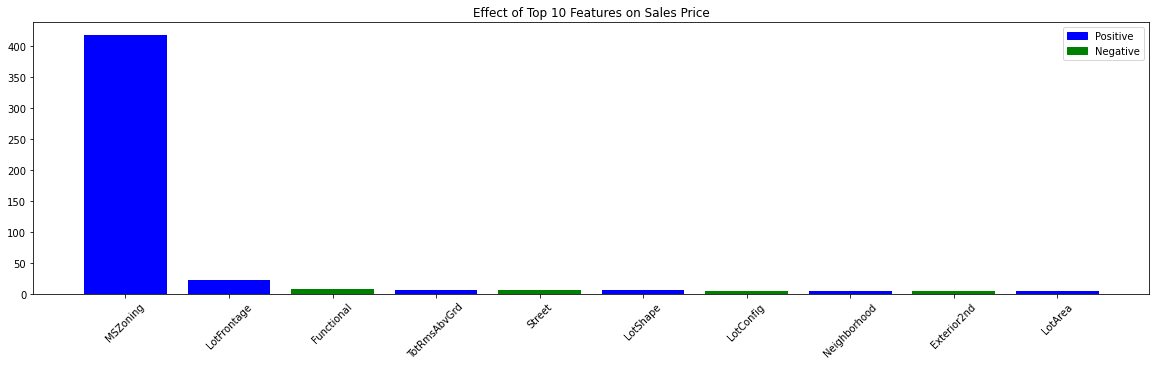

In [364]:
plt.figure(figsize=(20,5))
colors = {'Positive':'blue', 'Negative':'green'}         
labels = list(colors.keys())
plt.bar(df_top['Feature'], df_top['Coef_Absolute'], color = df_top.Colour, label=labels)
plt.xticks(rotation=45)
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title('Effect of Top 10 Features on Sales Price')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

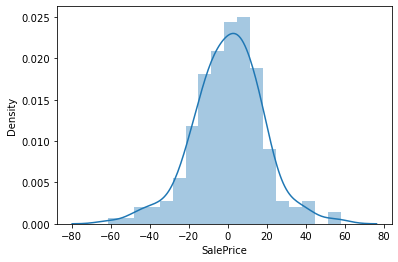

In [365]:
sns.distplot(y_test-y_test_pred)

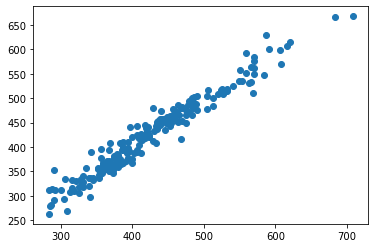

In [366]:
# We are getting an almost normal distribution in our predicted values
plt.scatter(y_test,y_test_pred)

In [367]:
# The model is also almost a straight line

In [368]:
import joblib
joblib.dump(ridge,'House_Price_Prediction.pkl')

['House_Price_Prediction.pkl']

# Loading test file

In [331]:
df1=pd.read_csv('housing_test.csv')

In [332]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


### Doing all preprocessig steps same as training data

In [333]:
#checking shape of dataset
shape=df1.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])


Total Number of Rows :  292
Total Number of Features :  80


In [334]:
#checking for null values
print(df1.isnull().values.any())

True


In [335]:
#Removing irrelevant features6
df1.drop(["Id"],axis=1,inplace=True)

In [336]:
#making seperate lists of categorical and continuos varioables
categorical=[x for x in df1.columns if df1[x].dtype==object]
cont=[x for x in df1.columns if x not in categorical]

In [337]:
len(cont)

37

In [338]:
len(categorical)

42

In [339]:
df1['MasVnrType'].value_counts()

None       168
BrkFace     91
Stone       30
BrkCmn       2
Name: MasVnrType, dtype: int64

In [340]:
for i in categorical:
    if df1[i].isnull().sum()>0:
         print("{}: {}% missing values".format(i, round(df1[i].isnull().sum() * 100/len(df1[i]),2)))

Alley: 95.21% missing values
MasVnrType: 0.34% missing values
BsmtQual: 2.4% missing values
BsmtCond: 2.4% missing values
BsmtExposure: 2.4% missing values
BsmtFinType1: 2.4% missing values
BsmtFinType2: 2.4% missing values
Electrical: 0.34% missing values
FireplaceQu: 47.6% missing values
GarageType: 5.82% missing values
GarageFinish: 5.82% missing values
GarageQual: 5.82% missing values
GarageCond: 5.82% missing values
Fence: 84.93% missing values
MiscFeature: 96.58% missing values


In [341]:
# For Alley, NA means No_alley_access. Let's replace NAs with 'No_alley_access'
df1['Alley'].fillna('No_alley_access',inplace=True)
print(df1['Alley'].value_counts())

df1['MasVnrType'].fillna('none',inplace=True)
print(df1['MasVnrType'].value_counts())

basement=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
#NA means No_Basement for all i in basement. Let's replace NAs with 'No_Basement'
for i in basement:
    df1[i].fillna('No_Basement',inplace=True)
    print(df1[i].value_counts())

# for FireplaceQu NA means no fireplace
df1['FireplaceQu'].fillna('No_fireplace',inplace=True)
print(df1['FireplaceQu'].value_counts())  

#for GarageType NA means no garage
garage=['GarageType','GarageFinish','GarageQual','GarageCond']
#NA means no_garage for all i in garage. Let's replace NAs with 'No_Basement'
for i in garage:
    df1[i].fillna('no_garage',inplace=True)
    print(df1[i].value_counts())

# As per given definition, NA means None. Let's replace NAs with 'None'
df1['MiscFeature'].fillna('None',inplace=True)
print(df1['MiscFeature'].value_counts())

# As per given definition, NA means None. Let's replace NAs with 'None'

df1['Electrical']=df1['Electrical'].fillna(df1['Electrical'].mode()[0])

# As per given definition, NA means No_Fence. Let's replace NAs with 'No_Fence'
df1['Fence'].fillna('No_Fence',inplace=True)
print(df1['Fence'].value_counts())

# As per given definition, NA means No_Fence. Let's replace NAs with 'No_Fence'
df1['FireplaceQu'].fillna('No_fireplace',inplace=True)
print(df1['FireplaceQu'].value_counts())




No_alley_access    278
Grvl                 9
Pave                 5
Name: Alley, dtype: int64
None       168
BrkFace     91
Stone       30
BrkCmn       2
none         1
Name: MasVnrType, dtype: int64
TA             132
Gd             120
Ex              27
No_Basement      7
Fa               6
Name: BsmtQual, dtype: int64
TA             270
Gd               9
No_Basement      7
Fa               6
Name: BsmtCond, dtype: int64
No             197
Av              41
Gd              26
Mn              21
No_Basement      7
Name: BsmtExposure, dtype: int64
GLQ            88
Unf            85
ALQ            46
BLQ            27
Rec            24
LwQ            15
No_Basement     7
Name: BsmtFinType1, dtype: int64
Unf            254
Rec             11
BLQ              9
No_Basement      7
LwQ              6
ALQ              3
GLQ              2
Name: BsmtFinType2, dtype: int64
No_fireplace    139
Gd               79
TA               61
Fa                8
Ex                3
Po               

In [342]:
#Again checking for missing value in,object dtype column
for i in categorical:
    if df1[i].isnull().sum()>1:
         print("{}: {}% missing values".format(i, round(df1[i].isnull().sum() * 100/len(df1[i]),2)))

<AxesSubplot:>

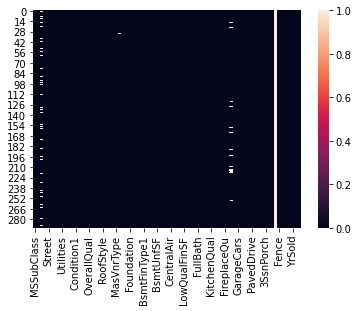

In [343]:
sns.heatmap(df1.isnull())

In [344]:

for i in cont:
    if df1[i].isnull().sum()>0:
         print("{}: {}% missing values".format(i, round(df1[i].isnull().sum() * 100/len(df1[i]),2)))

LotFrontage: 15.41% missing values
MasVnrArea: 0.34% missing values
GarageYrBlt: 5.82% missing values
PoolQC: 100.0% missing values


In [345]:
#Removing irrelevant features6
df1.drop(["Utilities","PoolQC"],axis=1,inplace=True)

In [346]:
#dropping least correlated column
df1.drop(['MSSubClass' ,'OverallCond' ,'OverallCond' ,'LowQualFinSF' ,'BsmtHalfBath' ,'YrSold', 'MiscVal', 'MoSold', '3SsnPorch'],axis=1,inplace=True)

In [347]:
#creating new categorical and cont variable list and label encoding the categorical columns

categorical=[x for x in df1.columns if df1[x].dtype==object]
cont=[x for x in df1.columns if x not in categorical]


In [348]:
#filling missing data with imputation for numerical data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values  = np.nan, strategy = 'mean')
for i in cont:
    df1[i]=imp.fit_transform(df1[i].values.reshape(-1,1))


In [350]:
#transform non numeric column into numeric one
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df1.columns:
    if df1[col].dtype==np.number:
        continue
    df1[col]=le.fit_transform(df1[col])

In [351]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1=sc.fit_transform(df1)

In [352]:

#lets use n=49
pca = PCA(n_components=49)
df1=pca.fit_transform(df1)

In [353]:
#predicting test dataset
model = joblib.load('House_Price_Prediction.pkl')
sale_price = model.predict(df1)
print(sale_price)


[545.01090686 455.78795526 517.66650704 383.95205608 528.91901647
 302.84542319 404.64193705 502.62511555 443.99290948 440.28701782
 211.02571117 362.91847806 314.07999814 364.71674726 523.35723926
 327.91223358 384.13471194 342.61046898 479.40793957 458.19937532
 340.26347932 404.37554562 400.8670139  332.76539424 283.98831272
 387.07798183 456.00743359 361.24591693 432.29009113 258.67457125
 422.67117226 457.04347587 482.83600423 388.06553913 257.15971854
 472.57957002 484.27096361 352.85331732 436.30671736 411.15355443
 290.31876264 514.50989474 513.86607834 476.84181045 434.82093512
 340.97906146 347.84698442 297.76209416 493.13810044 561.28163835
 371.16668558 435.13274097 302.71964078 276.14426963 522.75539241
 362.73953833 336.50082976 481.85899304 313.9855975  516.77387598
 346.14658105 461.01375595 352.00080328 420.84477863 466.2803982
 335.15393513 427.72952432 429.10642388 405.67338715 351.47076189
 502.68426327 403.55264329 348.17159607 404.67971105 384.00016118
 520.478782